In [1]:
import csv
import datetime
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm
# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')
# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')
archivo = 'ene_febDFde1a4.csv'
dataframefinal = pd.read_csv('nuevascategorias_enfermedades/porfechayrango/' + archivo, sep = ',')
print(dataframefinal.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    40 non-null     int64  
 1   Unnamed: 0.1                  40 non-null     float64
 2   IRA_Alta                      40 non-null     float64
 3   Influenza                     40 non-null     float64
 4   Neumonia                      40 non-null     float64
 5   Bronquitis_bronquiolitis      40 non-null     float64
 6   Crisis_obstructiva_bronquial  40 non-null     float64
 7   Otra_causa_respiratoria       40 non-null     float64
 8   CAUSAS_SISTEMA_RESPIRATORIO   40 non-null     float64
 9   COVID19_Confirmado_u          40 non-null     float64
 10  COVID19_Confirmado_h          40 non-null     float64
 11  Humedad                       40 non-null     float64
 12  Rocio                         40 non-null     float64
 13  Tempera

In [2]:
import itertools
periodos = ['ene_feb','mar_abr','may_jun','jul_ago','sep_oct','nov_dic']
rangosetareos = ['DFtotaltodos','DFmenores','DFde1a4','DFde5a14','DFde15a64','DFde65ymas']
#la linea a continuacion es importantisima, crea un diccionario de dataframes y luego elimina las molestas columnas que se generan automaticamente 
diccionario = {x+y :pd.read_csv('nuevascategorias_enfermedades/porfechayrango/' +x+y+ '.csv', sep = ',') for (x,y) in itertools.product(periodos,rangosetareos)}
for i in diccionario:
    del diccionario[i]["Unnamed: 0"]
    del diccionario[i]["Unnamed: 0.1"]

>## ***Importante***
>Para la creacion de los archivos .CSV que utilizo ademas del diccionario que creo aqui utilizo las claves para acceder a los valores autodescriptivos de la forma ***periodo-categoria*** donde los primeros 6 digitos hacen se refieren al periodo y los siguientes al rango de edad de la categoria al que pertenece siendo estos la concatenacion entre:
>>- ene_feb     
>>- mar_abr     
>>- may_jun 
>>- jul_ago  
>>- sep_oct
>>- nov_dic
>
>Cada periodos de dos en dos los meses del año y que comprenden 5 años desde ***2017 a 2021*** y los data frames
>
>>- DFtotaltodos: Todas las edades  
>>- DFmenores: Menores de 1 año
>>- DFde1a4: Niños de 1 a 4 años
>>- DFde5a14: Niños de 5 a 14 años
>>- DFde15a64: Adultos de 15 a 64 años
>>- DFde65ymas: Adultos mayores de 65 años
>

In [15]:
#del dataframefinal["Unnamed: 0"]
#del dataframefinal["Unnamed: 0.1"]
def algoritmo_dataframe(dataframefinal):
    print('----------------------')
    print('----------------------')
    print('Media de cada variable')
    print('----------------------')
    print(dataframefinal.mean(axis=0))

    print('-------------------------')
    print('Varianza de cada variable')
    print('-------------------------')
    print(dataframefinal.var(axis=0))
    plt.style.use('seaborn-whitegrid')
    dataframefinal.plot(x=None, y=["MP10", "MP2.5"], fontsize=20,
            kind="line",figsize=(20, 10)
                       )
    #plt.axes().set_facecolor("white")
    plt.xlabel("Semanas", fontsize=25)
    plt.ylabel("Cantidad (microgramos por metro cubico)", fontsize=25)

    plt.show()
    dataframefinal.plot(x=None, y=["Temperatura", "Rocio", "Temperatura_min", "Temperatura_max"], fontsize=20,
            kind="line",figsize=(20, 10)
                       )
    #plt.axes().set_facecolor("white")
    plt.xlabel("Semanas", fontsize=25)
    plt.ylabel("Grados Celcius", fontsize=25)

    plt.show()
    
    plt.style.use('tableau-colorblind10')
    # plot multiple columns such as population and year from dataframe
    dataframefinal.plot(x=None, y=["Humedad"], fontsize=20,
            kind="line",figsize=(20, 10)
                       )
    #plt.axes().set_facecolor("white")
    plt.xlabel("Semanas", fontsize=25)
    plt.ylabel("Porcentaje", fontsize=25)  #revisar porcentaje

    plt.show()
    #-------------------------------$$$$-------------------------------------
    plt.style.use('classic')
    # plot multiple columns such as population and year from dataframe
    dataframefinal.plot(x=None, y=["IRA_Alta", "Influenza","Neumonia", "Bronquitis_bronquiolitis", "Crisis_obstructiva_bronquial",
                                   "Otra_causa_respiratoria", "CAUSAS_SISTEMA_RESPIRATORIO", "COVID19_Confirmado_u",
                                   "COVID19_Confirmado_h"], fontsize=20, kind="line",figsize=(20, 10))
    #plt.axes().set_facecolor("white")
    plt.xlabel("Semanas", fontsize=25)
    plt.ylabel("Cantidad de Diagnosticados", fontsize=25)  #revisar porcentaje

    # display plot
    plt.show()
    #normalizar usando standartscaler para comparar se puede utilizar print y return para ver el frame y su describe para comprobar que cumpla con una media 0 y std de 1
    plt.style.use('seaborn-whitegrid')

    normaliza2 = StandardScaler().fit_transform(dataframefinal)

    frame = pd.DataFrame(data = normaliza2,
                        index = None,
                        columns = dataframefinal.columns.values)
    #display(frame)
    # Entrenamiento modelo PCA con escalado de los datos
    # ==============================================================================
    pca_pipe = make_pipeline(StandardScaler(), PCA())
    pca_pipe.fit(dataframefinal)

    # Se extrae el modelo entrenado del pipeline
    modelo_pca = pca_pipe.named_steps['pca']
    #modelo_pca.components_
    # Se combierte el array a dataframe para añadir nombres a los ejes.
    pd.DataFrame(
        data    = modelo_pca.components_,
        columns = dataframefinal.columns,
        index   = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16']
    )
    # Heatmap componentes
    # ==============================================================================
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))    # aqui cambie el dato, original (8,4)
    componentes = modelo_pca.components_
    plt.imshow(componentes.T, cmap='viridis', aspect='auto')
    plt.yticks(range(len(dataframefinal.columns)), dataframefinal.columns)
    plt.xticks(range(len(dataframefinal.columns)), np.arange(modelo_pca.n_components_) + 1)
    plt.grid(False)
    plt.colorbar();
    # Porcentaje de varianza explicada por cada componente
    # ==============================================================================
    #print('----------------------------------------------------')
    #print('Porcentaje de varianza explicada por cada componente')
    #print('----------------------------------------------------')
    #print(modelo_pca.explained_variance_ratio_)

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
    ax.bar(
        x      = np.arange(modelo_pca.n_components_) + 1,
        height = modelo_pca.explained_variance_ratio_
    )

    for x, y in zip(np.arange(len(dataframefinal.columns)) + 1, modelo_pca.explained_variance_ratio_):
        label = round(y, 2)
        ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

    ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
    ax.set_ylim(0, 1.1)
    ax.set_title('Porcentaje de varianza explicada por cada componente')
    ax.set_xlabel('Componente principal')
    ax.set_ylabel('Por. varianza explicada');
    # Porcentaje de varianza explicada acumulada
    # ==============================================================================
    prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
    #print('------------------------------------------')
    #print('Porcentaje de varianza explicada acumulada')
    #print('------------------------------------------')
    #print(prop_varianza_acum)

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
    ax.plot(
        np.arange(len(dataframefinal.columns)) + 1,
        prop_varianza_acum,
        marker = 'o'
    )

    for x, y in zip(np.arange(len(dataframefinal.columns)) + 1, prop_varianza_acum):
        label = round(y, 2)
        ax.annotate(
            label,
            (x,y),
            textcoords="offset points",
            xytext=(0,10),
            ha='center'
        )

    ax.set_ylim(0, 1.1)
    ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
    ax.set_title('Porcentaje de varianza explicada acumulada')
    ax.set_xlabel('Componente principal')
    ax.set_ylabel('Por. varianza acumulada');
    
    # Proyección de las observaciones de entrenamiento
    # ==============================================================================
    proyecciones = pca_pipe.transform(X=dataframefinal)
    proyecciones = pd.DataFrame(
        proyecciones,
        columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16'],
        index   = dataframefinal.index
    )
    #proyecciones.head()
    
    #return

----------------------
----------------------
Media de cada variable
----------------------
IRA_Alta                        63.8750
Influenza                        1.8500
Neumonia                         6.6000
Bronquitis_bronquiolitis        13.9250
Crisis_obstructiva_bronquial    13.1000
Otra_causa_respiratoria          9.5000
CAUSAS_SISTEMA_RESPIRATORIO      7.4000
COVID19_Confirmado_u             3.6000
COVID19_Confirmado_h             2.1000
Humedad                         65.5950
Rocio                           11.4150
Temperatura                     18.6725
Temperatura_min                 13.8150
Temperatura_max                 26.8125
MP10                            29.9325
MP2.5                            9.1300
dtype: float64
-------------------------
Varianza de cada variable
-------------------------
IRA_Alta                        387.394231
Influenza                         4.643590
Neumonia                          8.605128
Bronquitis_bronquiolitis         57.353205
Cri

/tmp/ipykernel_26518/3587679389.py:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


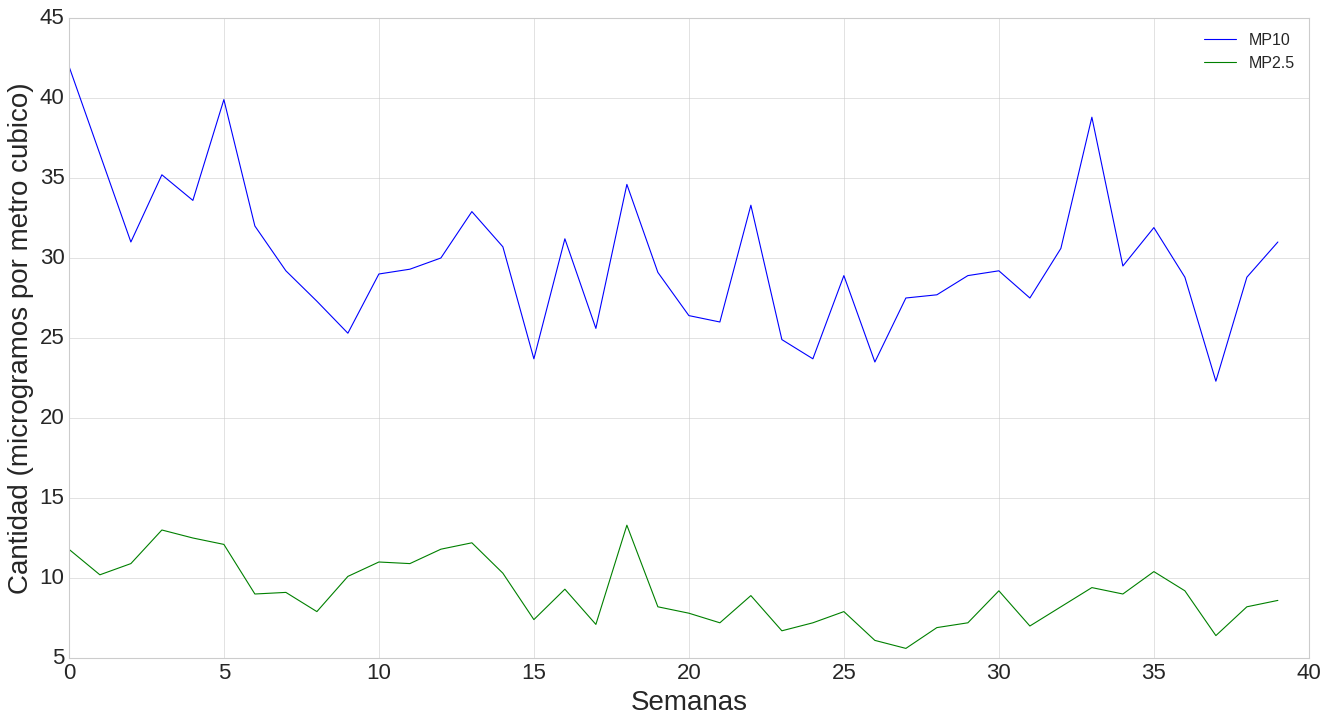

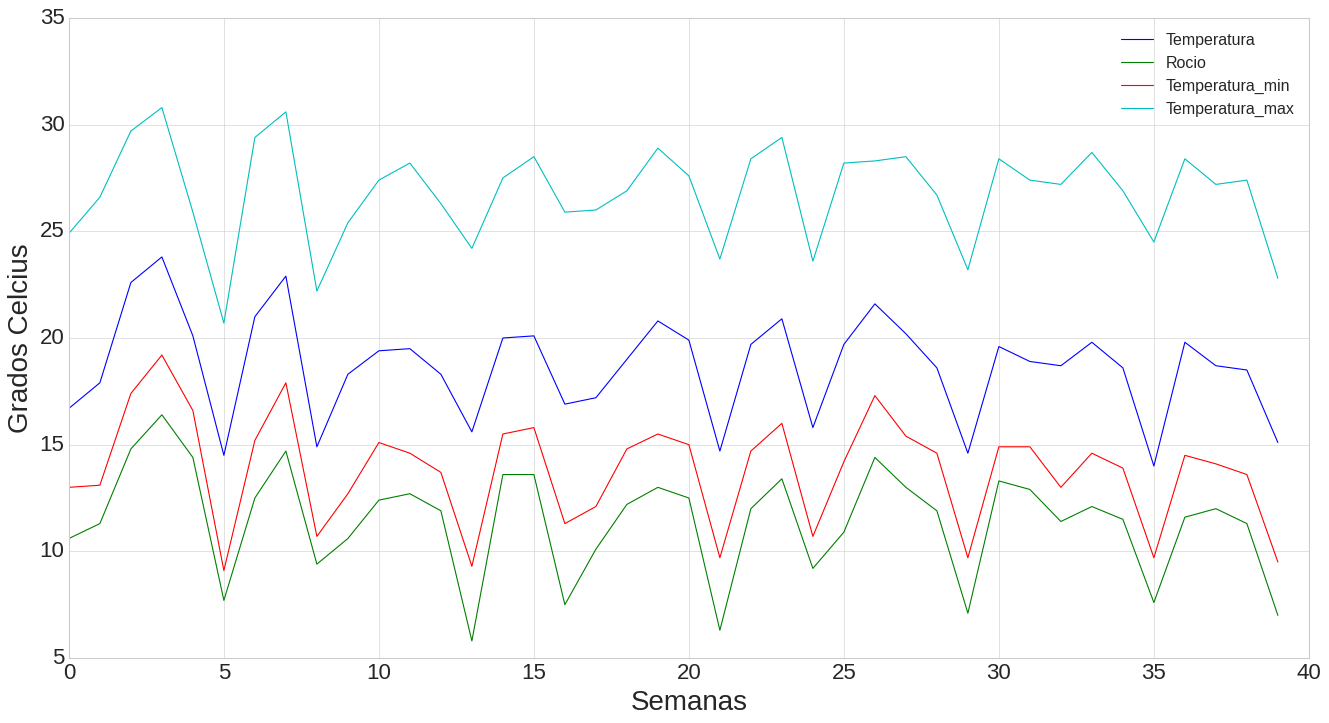

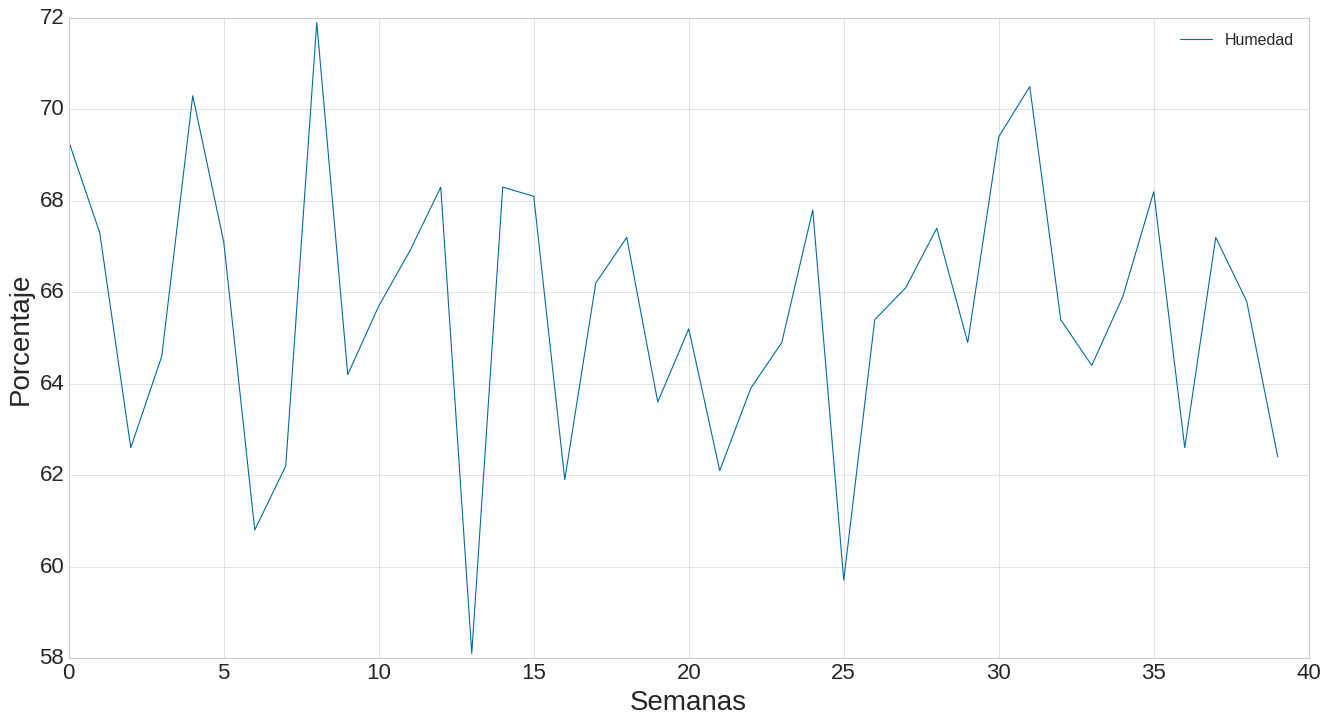

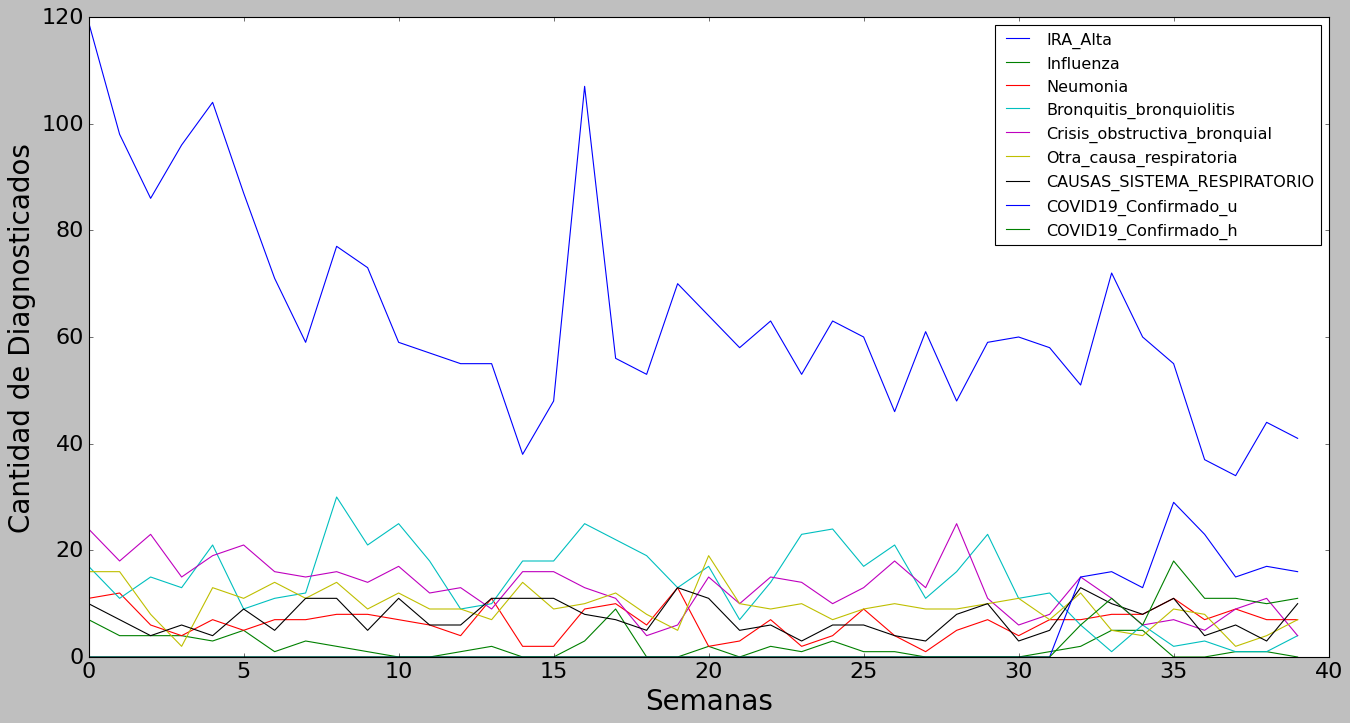

/tmp/ipykernel_26518/3587679389.py:55: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


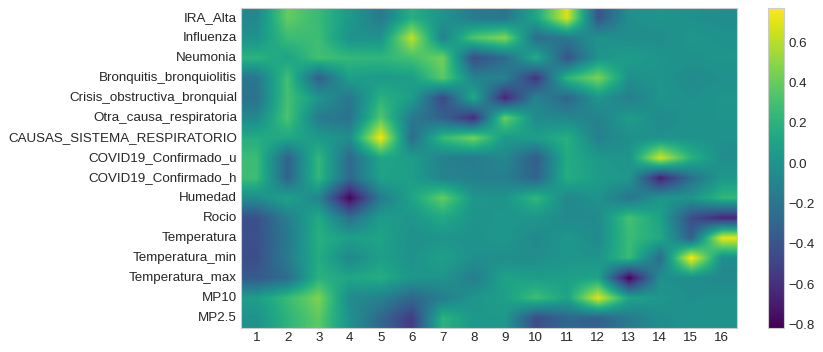

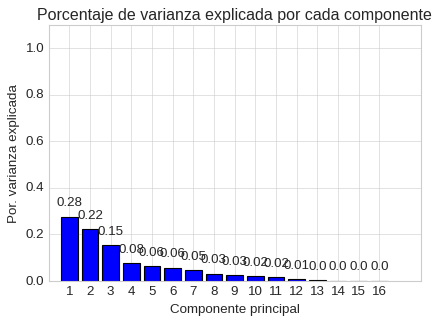

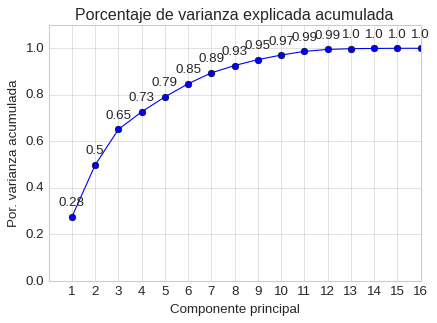

In [16]:
algoritmo_dataframe(diccionario['ene_febDFtotaltodos'])

In [6]:
#print(list(map(lambda x:diccionario[x].describe(), diccionario)))
for i in diccionario:
    print('     Periodo y categoria: '+i)
    display(diccionario[i].describe())
#dataframefinal.describe() 
#Count = cantidad de datos
#Mean = promedio 
#std = desviación estandar
#min = mínimo
#max = máximo

     Periodo y categoria: ene_febDFtotaltodos


,IRA_Alta,Influenza,Neumonia,Bronquitis_bronquiolitis,Crisis_obstructiva_bronquial,Otra_causa_respiratoria,CAUSAS_SISTEMA_RESPIRATORIO,COVID19_Confirmado_u,COVID19_Confirmado_h,Humedad,Rocio,Temperatura,Temperatura_min,Temperatura_max,MP10,MP2.5
count,40.000000,40.000000,40.00000,40.00000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,63.875000,1.850000,6.60000,13.92500,13.100000,9.500000,7.400000,3.600000,2.100000,65.595000,11.415000,18.672500,13.815000,26.812500,29.932500,9.130000
std,19.682333,2.154899,2.93345,7.57319,5.285685,3.658499,3.053371,7.631917,4.539287,3.015511,2.522976,2.407466,2.536053,2.320056,4.430164,2.036362
min,34.000000,0.000000,1.00000,1.00000,4.000000,2.000000,3.000000,0.000000,0.000000,58.100000,5.800000,14.000000,9.100000,20.700000,22.300000,5.600000
25%,53.000000,0.000000,4.00000,9.00000,9.750000,7.750000,5.000000,0.000000,0.000000,63.825000,10.475000,17.125000,12.550000,25.775000,27.450000,7.350000
50%,59.000000,1.000000,7.00000,13.50000,13.000000,9.000000,6.500000,0.000000,0.000000,65.750000,11.950000,18.950000,14.550000,27.300000,29.200000,9.000000
75%,71.250000,3.000000,8.00000,19.50000,16.000000,11.250000,10.250000,0.000000,0.000000,67.500000,13.000000,20.025000,15.250000,28.400000,31.925000,10.525000
max,119.000000,9.000000,13.00000,30.00000,25.000000,19.000000,13.000000,29.000000,18.000000,71.900000,16.400000,23.800000,19.200000,30.800000,42.000000,13.300000


     Periodo y categoria: ene_febDFmenores


,IRA_Alta,Influenza,Neumonia,Bronquitis_bronquiolitis,Crisis_obstructiva_bronquial,Otra_causa_respiratoria,CAUSAS_SISTEMA_RESPIRATORIO,COVID19_Confirmado_u,COVID19_Confirmado_h,Humedad,Rocio,Temperatura,Temperatura_min,Temperatura_max,MP10,MP2.5
count,40.000000,40.000000,40.00000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,8.950000,0.125000,0.15000,4.500000,0.050000,0.625000,0.250000,0.025000,0.025000,65.595000,11.415000,18.672500,13.815000,26.812500,29.932500,9.130000
std,4.755294,0.515777,0.36162,3.250247,0.220721,0.867874,0.543021,0.158114,0.158114,3.015511,2.522976,2.407466,2.536053,2.320056,4.430164,2.036362
min,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,58.100000,5.800000,14.000000,9.100000,20.700000,22.300000,5.600000
25%,5.750000,0.000000,0.00000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,63.825000,10.475000,17.125000,12.550000,25.775000,27.450000,7.350000
50%,8.000000,0.000000,0.00000,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,65.750000,11.950000,18.950000,14.550000,27.300000,29.200000,9.000000
75%,13.000000,0.000000,0.00000,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,67.500000,13.000000,20.025000,15.250000,28.400000,31.925000,10.525000
max,18.000000,3.000000,1.00000,11.000000,1.000000,4.000000,2.000000,1.000000,1.000000,71.900000,16.400000,23.800000,19.200000,30.800000,42.000000,13.300000


     Periodo y categoria: ene_febDFde1a4


,IRA_Alta,Influenza,Neumonia,Bronquitis_bronquiolitis,Crisis_obstructiva_bronquial,Otra_causa_respiratoria,CAUSAS_SISTEMA_RESPIRATORIO,COVID19_Confirmado_u,COVID19_Confirmado_h,Humedad,Rocio,Temperatura,Temperatura_min,Temperatura_max,MP10,MP2.5
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.0,40.0,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,18.725000,0.350000,0.475000,5.950000,0.125000,0.500000,0.250000,0.0,0.0,65.595000,11.415000,18.672500,13.815000,26.812500,29.932500,9.130000
std,9.969151,0.769615,0.750641,3.630003,0.334932,0.905822,0.630425,0.0,0.0,3.015511,2.522976,2.407466,2.536053,2.320056,4.430164,2.036362
min,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,58.100000,5.800000,14.000000,9.100000,20.700000,22.300000,5.600000
25%,12.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.0,0.0,63.825000,10.475000,17.125000,12.550000,25.775000,27.450000,7.350000
50%,18.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.0,0.0,65.750000,11.950000,18.950000,14.550000,27.300000,29.200000,9.000000
75%,23.000000,0.000000,1.000000,8.250000,0.000000,1.000000,0.000000,0.0,0.0,67.500000,13.000000,20.025000,15.250000,28.400000,31.925000,10.525000
max,46.000000,3.000000,3.000000,13.000000,1.000000,4.000000,3.000000,0.0,0.0,71.900000,16.400000,23.800000,19.200000,30.800000,42.000000,13.300000


     Periodo y categoria: ene_febDFde5a14


,IRA_Alta,Influenza,Neumonia,Bronquitis_bronquiolitis,Crisis_obstructiva_bronquial,Otra_causa_respiratoria,CAUSAS_SISTEMA_RESPIRATORIO,COVID19_Confirmado_u,COVID19_Confirmado_h,Humedad,Rocio,Temperatura,Temperatura_min,Temperatura_max,MP10,MP2.5
count,40.000000,40.000000,40.00000,40.000000,40.000000,40.000000,40.000000,40.0,40.0,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,15.650000,0.700000,0.15000,3.175000,0.575000,0.800000,0.200000,0.0,0.0,65.595000,11.415000,18.672500,13.815000,26.812500,29.932500,9.130000
std,8.125774,0.939176,0.36162,2.406055,0.594311,1.362501,0.516398,0.0,0.0,3.015511,2.522976,2.407466,2.536053,2.320056,4.430164,2.036362
min,2.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,58.100000,5.800000,14.000000,9.100000,20.700000,22.300000,5.600000
25%,9.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,63.825000,10.475000,17.125000,12.550000,25.775000,27.450000,7.350000
50%,15.000000,0.000000,0.00000,2.500000,1.000000,0.000000,0.000000,0.0,0.0,65.750000,11.950000,18.950000,14.550000,27.300000,29.200000,9.000000
75%,21.000000,2.000000,0.00000,5.000000,1.000000,1.000000,0.000000,0.0,0.0,67.500000,13.000000,20.025000,15.250000,28.400000,31.925000,10.525000
max,33.000000,3.000000,1.00000,8.000000,2.000000,6.000000,2.000000,0.0,0.0,71.900000,16.400000,23.800000,19.200000,30.800000,42.000000,13.300000


     Periodo y categoria: ene_febDFde15a64


,IRA_Alta,Influenza,Neumonia,Bronquitis_bronquiolitis,Crisis_obstructiva_bronquial,Otra_causa_respiratoria,CAUSAS_SISTEMA_RESPIRATORIO,COVID19_Confirmado_u,COVID19_Confirmado_h,Humedad,Rocio,Temperatura,Temperatura_min,Temperatura_max,MP10,MP2.5
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,19.025000,0.600000,2.950000,0.250000,7.050000,4.075000,3.150000,2.350000,1.250000,65.595000,11.415000,18.672500,13.815000,26.812500,29.932500,9.130000
std,8.939935,1.007663,2.194983,0.630425,3.396454,1.831176,2.032429,4.959063,2.686624,3.015511,2.522976,2.407466,2.536053,2.320056,4.430164,2.036362
min,8.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,58.100000,5.800000,14.000000,9.100000,20.700000,22.300000,5.600000
25%,13.000000,0.000000,1.000000,0.000000,4.750000,3.000000,1.750000,0.000000,0.000000,63.825000,10.475000,17.125000,12.550000,25.775000,27.450000,7.350000
50%,16.000000,0.000000,3.000000,0.000000,7.000000,4.000000,3.000000,0.000000,0.000000,65.750000,11.950000,18.950000,14.550000,27.300000,29.200000,9.000000
75%,24.000000,1.000000,5.000000,0.000000,9.000000,5.000000,5.000000,0.000000,0.000000,67.500000,13.000000,20.025000,15.250000,28.400000,31.925000,10.525000
max,43.000000,4.000000,7.000000,3.000000,18.000000,8.000000,8.000000,18.000000,10.000000,71.900000,16.400000,23.800000,19.200000,30.800000,42.000000,13.300000


     Periodo y categoria: ene_febDFde65ymas


,IRA_Alta,Influenza,Neumonia,Bronquitis_bronquiolitis,Crisis_obstructiva_bronquial,Otra_causa_respiratoria,CAUSAS_SISTEMA_RESPIRATORIO,COVID19_Confirmado_u,COVID19_Confirmado_h,Humedad,Rocio,Temperatura,Temperatura_min,Temperatura_max,MP10,MP2.5
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.0,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,1.525000,0.075000,2.875000,0.050000,5.300000,3.5,3.550000,1.225000,0.825000,65.595000,11.415000,18.672500,13.815000,26.812500,29.932500,9.130000
std,1.601081,0.266747,1.588218,0.220721,2.936944,2.0,1.866712,2.731464,1.920036,3.015511,2.522976,2.407466,2.536053,2.320056,4.430164,2.036362
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,58.100000,5.800000,14.000000,9.100000,20.700000,22.300000,5.600000
25%,0.000000,0.000000,2.000000,0.000000,3.000000,2.0,2.000000,0.000000,0.000000,63.825000,10.475000,17.125000,12.550000,25.775000,27.450000,7.350000
50%,1.000000,0.000000,3.000000,0.000000,5.000000,3.0,3.000000,0.000000,0.000000,65.750000,11.950000,18.950000,14.550000,27.300000,29.200000,9.000000
75%,2.000000,0.000000,4.000000,0.000000,7.000000,4.0,4.250000,0.000000,0.000000,67.500000,13.000000,20.025000,15.250000,28.400000,31.925000,10.525000
max,7.000000,1.000000,7.000000,1.000000,12.000000,9.0,8.000000,11.000000,8.000000,71.900000,16.400000,23.800000,19.200000,30.800000,42.000000,13.300000


     Periodo y categoria: mar_abrDFtotaltodos


,IRA_Alta,Influenza,Neumonia,Bronquitis_bronquiolitis,Crisis_obstructiva_bronquial,Otra_causa_respiratoria,CAUSAS_SISTEMA_RESPIRATORIO,COVID19_Confirmado_u,COVID19_Confirmado_h,Humedad,Rocio,Temperatura,Temperatura_min,Temperatura_max,MP10,MP2.5
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.00000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,93.155556,3.111111,6.622222,31.288889,16.311111,11.266667,7.044444,7.133333,3.80000,68.904444,10.371111,16.728889,11.942222,24.851111,36.442222,11.591111
std,39.773767,3.785272,3.235379,26.578035,7.159933,3.990899,3.081879,15.564528,8.47617,3.467443,1.722923,1.637296,1.748569,1.833975,7.860271,2.705283
min,23.000000,0.000000,0.000000,0.000000,4.000000,4.000000,0.000000,0.000000,0.00000,61.300000,6.600000,14.000000,7.500000,21.300000,24.100000,7.100000
25%,56.000000,0.000000,4.000000,4.000000,11.000000,8.000000,5.000000,0.000000,0.00000,66.700000,9.500000,15.500000,10.700000,23.300000,28.600000,9.700000
50%,102.000000,2.000000,6.000000,20.000000,15.000000,11.000000,7.000000,0.000000,0.00000,69.500000,10.300000,16.400000,11.700000,24.800000,37.700000,11.300000
75%,123.000000,5.000000,9.000000,56.000000,22.000000,13.000000,9.000000,0.000000,0.00000,70.800000,11.500000,18.100000,13.600000,26.400000,41.700000,13.100000
max,171.000000,15.000000,14.000000,88.000000,30.000000,22.000000,14.000000,52.000000,30.00000,77.200000,13.500000,20.700000,15.800000,27.500000,56.200000,19.200000


     Periodo y categoria: mar_abrDFmenores


,IRA_Alta,Influenza,Neumonia,Bronquitis_bronquiolitis,Crisis_obstructiva_bronquial,Otra_causa_respiratoria,CAUSAS_SISTEMA_RESPIRATORIO,COVID19_Confirmado_u,COVID19_Confirmado_h,Humedad,Rocio,Temperatura,Temperatura_min,Temperatura_max,MP10,MP2.5
count,45.000000,45.000000,45.000000,45.000000,45.0,45.000000,45.000000,45.0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,12.088889,0.022222,0.177778,6.666667,0.0,0.822222,0.288889,0.0,0.022222,68.904444,10.371111,16.728889,11.942222,24.851111,36.442222,11.591111
std,8.081467,0.149071,0.490310,6.131143,0.0,1.006544,0.626034,0.0,0.149071,3.467443,1.722923,1.637296,1.748569,1.833975,7.860271,2.705283
min,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,61.300000,6.600000,14.000000,7.500000,21.300000,24.100000,7.100000
25%,5.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.0,0.000000,66.700000,9.500000,15.500000,10.700000,23.300000,28.600000,9.700000
50%,12.000000,0.000000,0.000000,6.000000,0.0,1.000000,0.000000,0.0,0.000000,69.500000,10.300000,16.400000,11.700000,24.800000,37.700000,11.300000
75%,18.000000,0.000000,0.000000,11.000000,0.0,1.000000,0.000000,0.0,0.000000,70.800000,11.500000,18.100000,13.600000,26.400000,41.700000,13.100000
max,36.000000,1.000000,2.000000,22.000000,0.0,4.000000,3.000000,0.0,1.000000,77.200000,13.500000,20.700000,15.800000,27.500000,56.200000,19.200000


     Periodo y categoria: mar_abrDFde1a4


,IRA_Alta,Influenza,Neumonia,Bronquitis_bronquiolitis,Crisis_obstructiva_bronquial,Otra_causa_respiratoria,CAUSAS_SISTEMA_RESPIRATORIO,COVID19_Confirmado_u,COVID19_Confirmado_h,Humedad,Rocio,Temperatura,Temperatura_min,Temperatura_max,MP10,MP2.5
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,27.288889,0.400000,0.400000,16.088889,0.333333,0.822222,0.355556,0.0,0.022222,68.904444,10.371111,16.728889,11.942222,24.851111,36.442222,11.591111
std,20.420157,1.031327,0.863397,14.986088,0.768706,1.050733,0.570309,0.0,0.149071,3.467443,1.722923,1.637296,1.748569,1.833975,7.860271,2.705283
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,61.300000,6.600000,14.000000,7.500000,21.300000,24.100000,7.100000
25%,8.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,66.700000,9.500000,15.500000,10.700000,23.300000,28.600000,9.700000
50%,23.000000,0.000000,0.000000,10.000000,0.000000,1.000000,0.000000,0.0,0.000000,69.500000,10.300000,16.400000,11.700000,24.800000,37.700000,11.300000
75%,43.000000,0.000000,0.000000,29.000000,0.000000,1.000000,1.000000,0.0,0.000000,70.800000,11.500000,18.100000,13.600000,26.400000,41.700000,13.100000
max,89.000000,6.000000,4.000000,51.000000,3.000000,5.000000,2.000000,0.0,1.000000,77.200000,13.500000,20.700000,15.800000,27.500000,56.200000,19.200000


     Periodo y categoria: mar_abrDFde5a14


,IRA_Alta,Influenza,Neumonia,Bronquitis_bronquiolitis,Crisis_obstructiva_bronquial,Otra_causa_respiratoria,CAUSAS_SISTEMA_RESPIRATORIO,COVID19_Confirmado_u,COVID19_Confirmado_h,Humedad,Rocio,Temperatura,Temperatura_min,Temperatura_max,MP10,MP2.5
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,21.288889,1.088889,0.311111,7.888889,0.866667,0.866667,0.511111,0.177778,0.044444,68.904444,10.371111,16.728889,11.942222,24.851111,36.442222,11.591111
std,13.076040,1.592914,0.668180,7.046025,1.159937,0.919486,0.869227,0.534657,0.298142,3.467443,1.722923,1.637296,1.748569,1.833975,7.860271,2.705283
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,61.300000,6.600000,14.000000,7.500000,21.300000,24.100000,7.100000
25%,9.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,66.700000,9.500000,15.500000,10.700000,23.300000,28.600000,9.700000
50%,24.000000,0.000000,0.000000,6.000000,0.000000,1.000000,0.000000,0.000000,0.000000,69.500000,10.300000,16.400000,11.700000,24.800000,37.700000,11.300000
75%,30.000000,2.000000,0.000000,14.000000,1.000000,1.000000,1.000000,0.000000,0.000000,70.800000,11.500000,18.100000,13.600000,26.400000,41.700000,13.100000
max,45.000000,6.000000,3.000000,24.000000,5.000000,4.000000,4.000000,3.000000,2.000000,77.200000,13.500000,20.700000,15.800000,27.500000,56.200000,19.200000


     Periodo y categoria: mar_abrDFde15a64


,IRA_Alta,Influenza,Neumonia,Bronquitis_bronquiolitis,Crisis_obstructiva_bronquial,Otra_causa_respiratoria,CAUSAS_SISTEMA_RESPIRATORIO,COVID19_Confirmado_u,COVID19_Confirmado_h,Humedad,Rocio,Temperatura,Temperatura_min,Temperatura_max,MP10,MP2.5
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,30.577778,1.555556,3.022222,0.422222,9.933333,5.155556,2.844444,5.866667,3.000000,68.904444,10.371111,16.728889,11.942222,24.851111,36.442222,11.591111
std,19.719037,3.151879,2.359593,0.753443,5.029007,3.044784,1.594815,13.028989,6.855655,3.467443,1.722923,1.637296,1.748569,1.833975,7.860271,2.705283
min,12.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,61.300000,6.600000,14.000000,7.500000,21.300000,24.100000,7.100000
25%,21.000000,0.000000,2.000000,0.000000,7.000000,3.000000,2.000000,0.000000,0.000000,66.700000,9.500000,15.500000,10.700000,23.300000,28.600000,9.700000
50%,25.000000,0.000000,2.000000,0.000000,9.000000,4.000000,3.000000,0.000000,0.000000,69.500000,10.300000,16.400000,11.700000,24.800000,37.700000,11.300000
75%,30.000000,1.000000,4.000000,1.000000,13.000000,6.000000,3.000000,0.000000,0.000000,70.800000,11.500000,18.100000,13.600000,26.400000,41.700000,13.100000
max,123.000000,15.000000,10.000000,3.000000,22.000000,18.000000,8.000000,43.000000,24.000000,77.200000,13.500000,20.700000,15.800000,27.500000,56.200000,19.200000


     Periodo y categoria: mar_abrDFde65ymas


,IRA_Alta,Influenza,Neumonia,Bronquitis_bronquiolitis,Crisis_obstructiva_bronquial,Otra_causa_respiratoria,CAUSAS_SISTEMA_RESPIRATORIO,COVID19_Confirmado_u,COVID19_Confirmado_h,Humedad,Rocio,Temperatura,Temperatura_min,Temperatura_max,MP10,MP2.5
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,1.911111,0.044444,2.711111,0.222222,5.177778,3.600000,3.044444,1.088889,0.711111,68.904444,10.371111,16.728889,11.942222,24.851111,36.442222,11.591111
std,1.221441,0.208409,1.575699,0.471405,2.846760,1.737292,1.953500,2.391483,1.659987,3.467443,1.722923,1.637296,1.748569,1.833975,7.860271,2.705283
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,61.300000,6.600000,14.000000,7.500000,21.300000,24.100000,7.100000
25%,1.000000,0.000000,2.000000,0.000000,3.000000,2.000000,2.000000,0.000000,0.000000,66.700000,9.500000,15.500000,10.700000,23.300000,28.600000,9.700000
50%,2.000000,0.000000,3.000000,0.000000,5.000000,4.000000,3.000000,0.000000,0.000000,69.500000,10.300000,16.400000,11.700000,24.800000,37.700000,11.300000
75%,3.000000,0.000000,3.000000,0.000000,7.000000,5.000000,4.000000,0.000000,0.000000,70.800000,11.500000,18.100000,13.600000,26.400000,41.700000,13.100000
max,5.000000,1.000000,7.000000,2.000000,15.000000,7.000000,7.000000,9.000000,6.000000,77.200000,13.500000,20.700000,15.800000,27.500000,56.200000,19.200000


     Periodo y categoria: may_junDFtotaltodos


,IRA_Alta,Influenza,Neumonia,Bronquitis_bronquiolitis,Crisis_obstructiva_bronquial,Otra_causa_respiratoria,CAUSAS_SISTEMA_RESPIRATORIO,COVID19_Confirmado_u,COVID19_Confirmado_h,Humedad,Rocio,Temperatura,Temperatura_min,Temperatura_max,MP10,MP2.5
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,113.475000,10.975000,9.450000,50.050000,24.275000,13.025000,10.825000,8.375000,4.775000,65.915000,7.385000,14.675000,9.550000,22.525000,54.360000,17.145000
std,54.904106,11.796322,6.404926,42.838366,19.504092,6.362903,5.481379,14.527935,8.477686,5.497811,2.379674,1.758897,1.862725,1.964525,15.631786,4.669868
min,39.000000,0.000000,2.000000,0.000000,5.000000,3.000000,2.000000,0.000000,0.000000,51.200000,0.700000,11.100000,5.900000,17.700000,31.200000,9.100000
25%,66.500000,1.750000,5.750000,3.000000,9.750000,9.000000,7.000000,0.000000,0.000000,63.425000,6.450000,13.275000,7.975000,21.225000,40.050000,13.875000
50%,114.000000,8.500000,7.000000,57.000000,20.500000,12.000000,9.000000,0.000000,0.000000,66.850000,7.850000,14.450000,9.450000,21.950000,53.300000,15.950000
75%,152.000000,15.250000,11.000000,82.250000,32.000000,17.500000,15.000000,7.000000,4.000000,68.800000,9.125000,16.100000,11.075000,24.700000,63.700000,19.450000
max,287.000000,49.000000,27.000000,150.000000,96.000000,26.000000,26.000000,42.000000,25.000000,76.800000,10.700000,18.000000,13.000000,25.700000,87.800000,30.600000


     Periodo y categoria: may_junDFmenores


,IRA_Alta,Influenza,Neumonia,Bronquitis_bronquiolitis,Crisis_obstructiva_bronquial,Otra_causa_respiratoria,CAUSAS_SISTEMA_RESPIRATORIO,COVID19_Confirmado_u,COVID19_Confirmado_h,Humedad,Rocio,Temperatura,Temperatura_min,Temperatura_max,MP10,MP2.5
count,40.000000,40.000000,40.000000,40.00000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,13.825000,0.125000,0.525000,11.22500,0.075000,0.850000,1.375000,0.100000,0.050000,65.915000,7.385000,14.675000,9.550000,22.525000,54.360000,17.145000
std,8.926732,0.404304,1.535687,10.52832,0.266747,1.098951,2.108438,0.303822,0.220721,5.497811,2.379674,1.758897,1.862725,1.964525,15.631786,4.669868
min,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,51.200000,0.700000,11.100000,5.900000,17.700000,31.200000,9.100000
25%,6.000000,0.000000,0.000000,0.75000,0.000000,0.000000,0.000000,0.000000,0.000000,63.425000,6.450000,13.275000,7.975000,21.225000,40.050000,13.875000
50%,13.500000,0.000000,0.000000,11.00000,0.000000,0.000000,0.500000,0.000000,0.000000,66.850000,7.850000,14.450000,9.450000,21.950000,53.300000,15.950000
75%,22.000000,0.000000,0.000000,19.25000,0.000000,1.250000,2.250000,0.000000,0.000000,68.800000,9.125000,16.100000,11.075000,24.700000,63.700000,19.450000
max,29.000000,2.000000,8.000000,39.00000,1.000000,4.000000,9.000000,1.000000,1.000000,76.800000,10.700000,18.000000,13.000000,25.700000,87.800000,30.600000


     Periodo y categoria: may_junDFde1a4


,IRA_Alta,Influenza,Neumonia,Bronquitis_bronquiolitis,Crisis_obstructiva_bronquial,Otra_causa_respiratoria,CAUSAS_SISTEMA_RESPIRATORIO,COVID19_Confirmado_u,COVID19_Confirmado_h,Humedad,Rocio,Temperatura,Temperatura_min,Temperatura_max,MP10,MP2.5
count,40.000000,40.000000,40.000000,40.00000,40.000000,40.000000,40.000000,40.0,40.0,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,33.975000,2.000000,1.025000,25.65000,0.250000,0.950000,0.925000,0.0,0.0,65.915000,7.385000,14.675000,9.550000,22.525000,54.360000,17.145000
std,23.907393,3.544588,2.056728,22.28205,0.630425,1.036513,1.268706,0.0,0.0,5.497811,2.379674,1.758897,1.862725,1.964525,15.631786,4.669868
min,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,51.200000,0.700000,11.100000,5.900000,17.700000,31.200000,9.100000
25%,11.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.0,0.0,63.425000,6.450000,13.275000,7.975000,21.225000,40.050000,13.875000
50%,38.500000,0.000000,0.000000,29.00000,0.000000,1.000000,1.000000,0.0,0.0,66.850000,7.850000,14.450000,9.450000,21.950000,53.300000,15.950000
75%,52.250000,2.250000,1.000000,44.00000,0.000000,1.000000,1.000000,0.0,0.0,68.800000,9.125000,16.100000,11.075000,24.700000,63.700000,19.450000
max,78.000000,15.000000,10.000000,69.00000,3.000000,4.000000,5.000000,0.0,0.0,76.800000,10.700000,18.000000,13.000000,25.700000,87.800000,30.600000


     Periodo y categoria: may_junDFde5a14


,IRA_Alta,Influenza,Neumonia,Bronquitis_bronquiolitis,Crisis_obstructiva_bronquial,Otra_causa_respiratoria,CAUSAS_SISTEMA_RESPIRATORIO,COVID19_Confirmado_u,COVID19_Confirmado_h,Humedad,Rocio,Temperatura,Temperatura_min,Temperatura_max,MP10,MP2.5
count,40.000000,40.000000,40.000000,40.000000,40.00000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,27.650000,4.375000,0.500000,12.425000,1.45000,0.925000,0.575000,0.125000,0.075000,65.915000,7.385000,14.675000,9.550000,22.525000,54.360000,17.145000
std,22.517856,7.564043,1.176697,11.390251,1.69388,1.185111,0.812956,0.334932,0.266747,5.497811,2.379674,1.758897,1.862725,1.964525,15.631786,4.669868
min,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,51.200000,0.700000,11.100000,5.900000,17.700000,31.200000,9.100000
25%,8.000000,0.000000,0.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,63.425000,6.450000,13.275000,7.975000,21.225000,40.050000,13.875000
50%,26.500000,1.500000,0.000000,13.000000,1.00000,0.000000,0.000000,0.000000,0.000000,66.850000,7.850000,14.450000,9.450000,21.950000,53.300000,15.950000
75%,41.250000,4.250000,0.000000,18.250000,2.00000,2.000000,1.000000,0.000000,0.000000,68.800000,9.125000,16.100000,11.075000,24.700000,63.700000,19.450000
max,102.000000,36.000000,5.000000,48.000000,7.00000,4.000000,3.000000,1.000000,1.000000,76.800000,10.700000,18.000000,13.000000,25.700000,87.800000,30.600000


     Periodo y categoria: may_junDFde15a64


,IRA_Alta,Influenza,Neumonia,Bronquitis_bronquiolitis,Crisis_obstructiva_bronquial,Otra_causa_respiratoria,CAUSAS_SISTEMA_RESPIRATORIO,COVID19_Confirmado_u,COVID19_Confirmado_h,Humedad,Rocio,Temperatura,Temperatura_min,Temperatura_max,MP10,MP2.5
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,35.725000,4.350000,4.125000,0.675000,15.075000,5.925000,3.700000,6.400000,3.375000,65.915000,7.385000,14.675000,9.550000,22.525000,54.360000,17.145000
std,14.783892,6.908004,2.728647,2.004962,13.303918,3.392204,1.727604,11.010019,6.002937,5.497811,2.379674,1.758897,1.862725,1.964525,15.631786,4.669868
min,15.000000,0.000000,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,51.200000,0.700000,11.100000,5.900000,17.700000,31.200000,9.100000
25%,25.000000,0.000000,2.000000,0.000000,6.750000,3.000000,2.000000,0.000000,0.000000,63.425000,6.450000,13.275000,7.975000,21.225000,40.050000,13.875000
50%,32.500000,1.000000,3.500000,0.000000,12.000000,5.500000,4.000000,0.000000,0.000000,66.850000,7.850000,14.450000,9.450000,21.950000,53.300000,15.950000
75%,42.500000,3.500000,5.250000,0.250000,19.250000,8.000000,5.000000,6.250000,3.750000,68.800000,9.125000,16.100000,11.075000,24.700000,63.700000,19.450000
max,81.000000,24.000000,11.000000,12.000000,68.000000,17.000000,8.000000,33.000000,18.000000,76.800000,10.700000,18.000000,13.000000,25.700000,87.800000,30.600000


     Periodo y categoria: may_junDFde65ymas


,IRA_Alta,Influenza,Neumonia,Bronquitis_bronquiolitis,Crisis_obstructiva_bronquial,Otra_causa_respiratoria,CAUSAS_SISTEMA_RESPIRATORIO,COVID19_Confirmado_u,COVID19_Confirmado_h,Humedad,Rocio,Temperatura,Temperatura_min,Temperatura_max,MP10,MP2.5
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,2.300000,0.125000,3.275000,0.075000,7.425000,4.375000,4.250000,1.750000,1.275000,65.915000,7.385000,14.675000,9.550000,22.525000,54.360000,17.145000
std,1.842518,0.404304,2.364128,0.266747,5.930743,2.958582,2.888971,3.432499,2.611488,5.497811,2.379674,1.758897,1.862725,1.964525,15.631786,4.669868
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,51.200000,0.700000,11.100000,5.900000,17.700000,31.200000,9.100000
25%,1.000000,0.000000,1.750000,0.000000,3.000000,2.750000,2.000000,0.000000,0.000000,63.425000,6.450000,13.275000,7.975000,21.225000,40.050000,13.875000
50%,2.000000,0.000000,3.000000,0.000000,6.000000,4.000000,4.000000,0.000000,0.000000,66.850000,7.850000,14.450000,9.450000,21.950000,53.300000,15.950000
75%,3.000000,0.000000,5.000000,0.000000,10.000000,6.000000,6.000000,1.000000,0.250000,68.800000,9.125000,16.100000,11.075000,24.700000,63.700000,19.450000
max,7.000000,2.000000,10.000000,1.000000,25.000000,13.000000,10.000000,11.000000,9.000000,76.800000,10.700000,18.000000,13.000000,25.700000,87.800000,30.600000


     Periodo y categoria: jul_agoDFtotaltodos


,IRA_Alta,Influenza,Neumonia,Bronquitis_bronquiolitis,Crisis_obstructiva_bronquial,Otra_causa_respiratoria,CAUSAS_SISTEMA_RESPIRATORIO,COVID19_Confirmado_u,COVID19_Confirmado_h,Humedad,Rocio,Temperatura,Temperatura_min,Temperatura_max,MP10,MP2.5
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.00000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.00000,45.000000
mean,121.488889,19.555556,13.400000,59.088889,30.422222,14.222222,15.60000,7.088889,3.688889,66.402222,7.342222,14.486667,9.391111,22.582222,50.02000,17.953333
std,77.986777,24.032701,9.691608,53.343579,20.487789,8.298107,8.81476,11.833739,6.189515,4.659911,1.779873,1.565915,1.452400,2.122637,11.87175,3.404315
min,39.000000,0.000000,0.000000,0.000000,4.000000,2.000000,0.00000,0.000000,0.000000,53.700000,1.900000,11.600000,6.600000,18.100000,24.60000,9.500000
25%,66.000000,6.000000,7.000000,5.000000,13.000000,9.000000,8.00000,0.000000,0.000000,63.500000,6.600000,13.600000,8.200000,21.200000,42.00000,15.700000
50%,94.000000,13.000000,10.000000,67.000000,28.000000,12.000000,14.00000,0.000000,0.000000,66.700000,7.500000,14.300000,9.500000,22.700000,52.40000,17.400000
75%,155.000000,26.000000,16.000000,89.000000,41.000000,19.000000,23.00000,11.000000,5.000000,69.400000,8.400000,15.600000,10.300000,24.100000,56.70000,20.600000
max,397.000000,133.000000,42.000000,193.000000,102.000000,35.000000,33.00000,46.000000,22.000000,77.100000,10.700000,17.300000,11.900000,26.500000,78.20000,24.900000


     Periodo y categoria: jul_agoDFmenores


,IRA_Alta,Influenza,Neumonia,Bronquitis_bronquiolitis,Crisis_obstructiva_bronquial,Otra_causa_respiratoria,CAUSAS_SISTEMA_RESPIRATORIO,COVID19_Confirmado_u,COVID19_Confirmado_h,Humedad,Rocio,Temperatura,Temperatura_min,Temperatura_max,MP10,MP2.5
count,45.000000,45.000000,45.000000,45.000000,45.0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.00000,45.000000
mean,15.044444,0.288889,0.955556,16.933333,0.0,0.866667,3.355556,0.044444,0.022222,66.402222,7.342222,14.486667,9.391111,22.582222,50.02000,17.953333
std,10.101655,0.626034,1.623066,16.410086,0.0,1.057441,3.536534,0.208409,0.149071,4.659911,1.779873,1.565915,1.452400,2.122637,11.87175,3.404315
min,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,53.700000,1.900000,11.600000,6.600000,18.100000,24.60000,9.500000
25%,6.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,63.500000,6.600000,13.600000,8.200000,21.200000,42.00000,15.700000
50%,14.000000,0.000000,0.000000,15.000000,0.0,1.000000,2.000000,0.000000,0.000000,66.700000,7.500000,14.300000,9.500000,22.700000,52.40000,17.400000
75%,22.000000,0.000000,1.000000,28.000000,0.0,1.000000,6.000000,0.000000,0.000000,69.400000,8.400000,15.600000,10.300000,24.100000,56.70000,20.600000
max,40.000000,3.000000,8.000000,53.000000,0.0,4.000000,11.000000,1.000000,1.000000,77.100000,10.700000,17.300000,11.900000,26.500000,78.20000,24.900000


     Periodo y categoria: jul_agoDFde1a4


,IRA_Alta,Influenza,Neumonia,Bronquitis_bronquiolitis,Crisis_obstructiva_bronquial,Otra_causa_respiratoria,CAUSAS_SISTEMA_RESPIRATORIO,COVID19_Confirmado_u,COVID19_Confirmado_h,Humedad,Rocio,Temperatura,Temperatura_min,Temperatura_max,MP10,MP2.5
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.0,45.000000,45.000000,45.000000,45.000000,45.000000,45.00000,45.000000
mean,31.688889,3.311111,1.911111,28.666667,0.222222,0.555556,1.733333,0.022222,0.0,66.402222,7.342222,14.486667,9.391111,22.582222,50.02000,17.953333
std,26.261640,5.636013,2.826998,26.224555,0.559581,1.098668,2.071451,0.149071,0.0,4.659911,1.779873,1.565915,1.452400,2.122637,11.87175,3.404315
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,53.700000,1.900000,11.600000,6.600000,18.100000,24.60000,9.500000
25%,8.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,63.500000,6.600000,13.600000,8.200000,21.200000,42.00000,15.700000
50%,30.000000,1.000000,1.000000,29.000000,0.000000,0.000000,1.000000,0.000000,0.0,66.700000,7.500000,14.300000,9.500000,22.700000,52.40000,17.400000
75%,48.000000,5.000000,3.000000,47.000000,0.000000,1.000000,3.000000,0.000000,0.0,69.400000,8.400000,15.600000,10.300000,24.100000,56.70000,20.600000
max,113.000000,28.000000,12.000000,82.000000,2.000000,5.000000,7.000000,1.000000,0.0,77.100000,10.700000,17.300000,11.900000,26.500000,78.20000,24.900000


     Periodo y categoria: jul_agoDFde5a14


,IRA_Alta,Influenza,Neumonia,Bronquitis_bronquiolitis,Crisis_obstructiva_bronquial,Otra_causa_respiratoria,CAUSAS_SISTEMA_RESPIRATORIO,COVID19_Confirmado_u,COVID19_Confirmado_h,Humedad,Rocio,Temperatura,Temperatura_min,Temperatura_max,MP10,MP2.5
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.0,45.000000,45.000000,45.000000,45.000000,45.000000,45.00000,45.000000
mean,31.488889,8.911111,0.577778,12.688889,1.244444,0.955556,0.555556,0.022222,0.0,66.402222,7.342222,14.486667,9.391111,22.582222,50.02000,17.953333
std,41.502805,16.651266,1.033284,14.075805,1.568954,1.296070,0.813398,0.149071,0.0,4.659911,1.779873,1.565915,1.452400,2.122637,11.87175,3.404315
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,53.700000,1.900000,11.600000,6.600000,18.100000,24.60000,9.500000
25%,8.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,63.500000,6.600000,13.600000,8.200000,21.200000,42.00000,15.700000
50%,17.000000,3.000000,0.000000,8.000000,1.000000,1.000000,0.000000,0.000000,0.0,66.700000,7.500000,14.300000,9.500000,22.700000,52.40000,17.400000
75%,41.000000,11.000000,1.000000,20.000000,2.000000,2.000000,1.000000,0.000000,0.0,69.400000,8.400000,15.600000,10.300000,24.100000,56.70000,20.600000
max,195.000000,94.000000,4.000000,56.000000,8.000000,7.000000,3.000000,1.000000,0.0,77.100000,10.700000,17.300000,11.900000,26.500000,78.20000,24.900000


     Periodo y categoria: jul_agoDFde15a64


,IRA_Alta,Influenza,Neumonia,Bronquitis_bronquiolitis,Crisis_obstructiva_bronquial,Otra_causa_respiratoria,CAUSAS_SISTEMA_RESPIRATORIO,COVID19_Confirmado_u,COVID19_Confirmado_h,Humedad,Rocio,Temperatura,Temperatura_min,Temperatura_max,MP10,MP2.5
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.00000,45.000000
mean,40.444444,6.444444,4.555556,0.711111,17.977778,5.866667,3.844444,5.222222,2.555556,66.402222,7.342222,14.486667,9.391111,22.582222,50.02000,17.953333
std,14.782600,6.753974,2.996631,0.968181,12.364702,3.858874,2.235616,8.933820,4.293523,4.659911,1.779873,1.565915,1.452400,2.122637,11.87175,3.404315
min,16.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,53.700000,1.900000,11.600000,6.600000,18.100000,24.60000,9.500000
25%,28.000000,1.000000,3.000000,0.000000,9.000000,3.000000,2.000000,0.000000,0.000000,63.500000,6.600000,13.600000,8.200000,21.200000,42.00000,15.700000
50%,40.000000,4.000000,4.000000,0.000000,17.000000,5.000000,4.000000,0.000000,0.000000,66.700000,7.500000,14.300000,9.500000,22.700000,52.40000,17.400000
75%,51.000000,10.000000,5.000000,1.000000,24.000000,8.000000,5.000000,9.000000,4.000000,69.400000,8.400000,15.600000,10.300000,24.100000,56.70000,20.600000
max,69.000000,24.000000,15.000000,3.000000,73.000000,20.000000,8.000000,33.000000,14.000000,77.100000,10.700000,17.300000,11.900000,26.500000,78.20000,24.900000


     Periodo y categoria: jul_agoDFde65ymas


,IRA_Alta,Influenza,Neumonia,Bronquitis_bronquiolitis,Crisis_obstructiva_bronquial,Otra_causa_respiratoria,CAUSAS_SISTEMA_RESPIRATORIO,COVID19_Confirmado_u,COVID19_Confirmado_h,Humedad,Rocio,Temperatura,Temperatura_min,Temperatura_max,MP10,MP2.5
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.00000,45.000000
mean,2.822222,0.600000,5.400000,0.088889,10.977778,5.977778,6.111111,1.777778,1.111111,66.402222,7.342222,14.486667,9.391111,22.582222,50.02000,17.953333
std,2.433562,1.074498,4.030565,0.358166,8.539983,3.822713,3.984186,3.103436,2.123700,4.659911,1.779873,1.565915,1.452400,2.122637,11.87175,3.404315
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,53.700000,1.900000,11.600000,6.600000,18.100000,24.60000,9.500000
25%,1.000000,0.000000,2.000000,0.000000,4.000000,3.000000,3.000000,0.000000,0.000000,63.500000,6.600000,13.600000,8.200000,21.200000,42.00000,15.700000
50%,2.000000,0.000000,4.000000,0.000000,9.000000,5.000000,6.000000,0.000000,0.000000,66.700000,7.500000,14.300000,9.500000,22.700000,52.40000,17.400000
75%,4.000000,1.000000,8.000000,0.000000,16.000000,8.000000,8.000000,3.000000,1.000000,69.400000,8.400000,15.600000,10.300000,24.100000,56.70000,20.600000
max,12.000000,4.000000,17.000000,2.000000,33.000000,18.000000,16.000000,12.000000,9.000000,77.100000,10.700000,17.300000,11.900000,26.500000,78.20000,24.900000


     Periodo y categoria: sep_octDFtotaltodos


,IRA_Alta,Influenza,Neumonia,Bronquitis_bronquiolitis,Crisis_obstructiva_bronquial,Otra_causa_respiratoria,CAUSAS_SISTEMA_RESPIRATORIO,COVID19_Confirmado_u,COVID19_Confirmado_h,Humedad,Rocio,Temperatura,Temperatura_min,Temperatura_max,MP10,MP2.5
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,103.288889,7.977778,10.133333,45.933333,23.133333,13.600000,11.066667,2.355556,1.200000,66.411111,8.622222,15.677778,10.555556,24.251111,36.375556,12.491111
std,63.833456,12.721651,5.998485,37.895430,13.198829,5.424691,4.928581,3.778862,1.949359,3.159705,1.013744,1.049868,1.159066,1.687066,10.018486,2.591316
min,22.000000,0.000000,1.000000,1.000000,3.000000,2.000000,3.000000,0.000000,0.000000,59.400000,6.300000,12.400000,7.700000,19.800000,17.800000,8.000000
25%,52.000000,2.000000,5.000000,7.000000,10.000000,10.000000,8.000000,0.000000,0.000000,64.600000,7.900000,15.000000,9.600000,23.100000,30.400000,10.700000
50%,97.000000,5.000000,10.000000,50.000000,24.000000,14.000000,10.000000,0.000000,0.000000,66.900000,8.700000,15.800000,10.500000,24.300000,35.200000,12.500000
75%,143.000000,10.000000,15.000000,70.000000,34.000000,17.000000,14.000000,4.000000,2.000000,68.500000,9.400000,16.300000,11.400000,25.500000,42.300000,14.700000
max,324.000000,84.000000,25.000000,148.000000,51.000000,24.000000,23.000000,14.000000,8.000000,73.600000,10.500000,17.600000,13.000000,28.200000,63.800000,17.400000


     Periodo y categoria: sep_octDFmenores


,IRA_Alta,Influenza,Neumonia,Bronquitis_bronquiolitis,Crisis_obstructiva_bronquial,Otra_causa_respiratoria,CAUSAS_SISTEMA_RESPIRATORIO,COVID19_Confirmado_u,COVID19_Confirmado_h,Humedad,Rocio,Temperatura,Temperatura_min,Temperatura_max,MP10,MP2.5
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,12.888889,0.133333,0.466667,11.311111,0.044444,1.088889,1.311111,0.044444,0.0,66.411111,8.622222,15.677778,10.555556,24.251111,36.375556,12.491111
std,8.581752,0.343776,0.726135,9.739382,0.208409,1.104170,1.458864,0.208409,0.0,3.159705,1.013744,1.049868,1.159066,1.687066,10.018486,2.591316
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,59.400000,6.300000,12.400000,7.700000,19.800000,17.800000,8.000000
25%,6.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,64.600000,7.900000,15.000000,9.600000,23.100000,30.400000,10.700000
50%,12.000000,0.000000,0.000000,14.000000,0.000000,1.000000,1.000000,0.000000,0.0,66.900000,8.700000,15.800000,10.500000,24.300000,35.200000,12.500000
75%,20.000000,0.000000,1.000000,17.000000,0.000000,2.000000,2.000000,0.000000,0.0,68.500000,9.400000,16.300000,11.400000,25.500000,42.300000,14.700000
max,34.000000,1.000000,2.000000,34.000000,1.000000,4.000000,6.000000,1.000000,0.0,73.600000,10.500000,17.600000,13.000000,28.200000,63.800000,17.400000


     Periodo y categoria: sep_octDFde1a4


,IRA_Alta,Influenza,Neumonia,Bronquitis_bronquiolitis,Crisis_obstructiva_bronquial,Otra_causa_respiratoria,CAUSAS_SISTEMA_RESPIRATORIO,COVID19_Confirmado_u,COVID19_Confirmado_h,Humedad,Rocio,Temperatura,Temperatura_min,Temperatura_max,MP10,MP2.5
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.0,45.0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,33.288889,1.600000,1.511111,21.933333,0.222222,0.466667,1.177778,0.0,0.0,66.411111,8.622222,15.677778,10.555556,24.251111,36.375556,12.491111
std,23.068694,2.387467,1.713877,17.429599,0.420437,0.694131,1.599558,0.0,0.0,3.159705,1.013744,1.049868,1.159066,1.687066,10.018486,2.591316
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,59.400000,6.300000,12.400000,7.700000,19.800000,17.800000,8.000000
25%,11.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.0,0.0,64.600000,7.900000,15.000000,9.600000,23.100000,30.400000,10.700000
50%,39.000000,0.000000,1.000000,22.000000,0.000000,0.000000,0.000000,0.0,0.0,66.900000,8.700000,15.800000,10.500000,24.300000,35.200000,12.500000
75%,51.000000,3.000000,3.000000,33.000000,0.000000,1.000000,2.000000,0.0,0.0,68.500000,9.400000,16.300000,11.400000,25.500000,42.300000,14.700000
max,76.000000,9.000000,6.000000,61.000000,1.000000,3.000000,5.000000,0.0,0.0,73.600000,10.500000,17.600000,13.000000,28.200000,63.800000,17.400000


     Periodo y categoria: sep_octDFde5a14


,IRA_Alta,Influenza,Neumonia,Bronquitis_bronquiolitis,Crisis_obstructiva_bronquial,Otra_causa_respiratoria,CAUSAS_SISTEMA_RESPIRATORIO,COVID19_Confirmado_u,COVID19_Confirmado_h,Humedad,Rocio,Temperatura,Temperatura_min,Temperatura_max,MP10,MP2.5
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,27.311111,3.200000,0.711111,12.177778,1.466667,0.955556,0.533333,0.066667,0.022222,66.411111,8.622222,15.677778,10.555556,24.251111,36.375556,12.491111
std,26.072297,10.100855,1.057919,12.175402,1.341641,1.065056,0.814639,0.252262,0.149071,3.159705,1.013744,1.049868,1.159066,1.687066,10.018486,2.591316
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59.400000,6.300000,12.400000,7.700000,19.800000,17.800000,8.000000
25%,7.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,64.600000,7.900000,15.000000,9.600000,23.100000,30.400000,10.700000
50%,24.000000,1.000000,0.000000,12.000000,1.000000,1.000000,0.000000,0.000000,0.000000,66.900000,8.700000,15.800000,10.500000,24.300000,35.200000,12.500000
75%,36.000000,3.000000,1.000000,18.000000,3.000000,2.000000,1.000000,0.000000,0.000000,68.500000,9.400000,16.300000,11.400000,25.500000,42.300000,14.700000
max,144.000000,68.000000,4.000000,59.000000,4.000000,3.000000,3.000000,1.000000,1.000000,73.600000,10.500000,17.600000,13.000000,28.200000,63.800000,17.400000


     Periodo y categoria: sep_octDFde15a64


,IRA_Alta,Influenza,Neumonia,Bronquitis_bronquiolitis,Crisis_obstructiva_bronquial,Otra_causa_respiratoria,CAUSAS_SISTEMA_RESPIRATORIO,COVID19_Confirmado_u,COVID19_Confirmado_h,Humedad,Rocio,Temperatura,Temperatura_min,Temperatura_max,MP10,MP2.5
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,27.866667,2.733333,3.755556,0.355556,13.288889,5.644444,3.333333,1.266667,0.644444,66.411111,8.622222,15.677778,10.555556,24.251111,36.375556,12.491111
std,14.386863,4.196319,2.337010,0.679423,8.052730,3.083354,2.044949,2.415857,1.281965,3.159705,1.013744,1.049868,1.159066,1.687066,10.018486,2.591316
min,11.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,59.400000,6.300000,12.400000,7.700000,19.800000,17.800000,8.000000
25%,19.000000,0.000000,2.000000,0.000000,7.000000,3.000000,2.000000,0.000000,0.000000,64.600000,7.900000,15.000000,9.600000,23.100000,30.400000,10.700000
50%,24.000000,1.000000,3.000000,0.000000,12.000000,5.000000,3.000000,0.000000,0.000000,66.900000,8.700000,15.800000,10.500000,24.300000,35.200000,12.500000
75%,35.000000,3.000000,5.000000,1.000000,19.000000,8.000000,4.000000,2.000000,1.000000,68.500000,9.400000,16.300000,11.400000,25.500000,42.300000,14.700000
max,82.000000,21.000000,9.000000,3.000000,35.000000,13.000000,9.000000,13.000000,7.000000,73.600000,10.500000,17.600000,13.000000,28.200000,63.800000,17.400000


     Periodo y categoria: sep_octDFde65ymas


,IRA_Alta,Influenza,Neumonia,Bronquitis_bronquiolitis,Crisis_obstructiva_bronquial,Otra_causa_respiratoria,CAUSAS_SISTEMA_RESPIRATORIO,COVID19_Confirmado_u,COVID19_Confirmado_h,Humedad,Rocio,Temperatura,Temperatura_min,Temperatura_max,MP10,MP2.5
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,1.933333,0.311111,3.688889,0.155556,8.111111,5.444444,4.711111,0.977778,0.533333,66.411111,8.622222,15.677778,10.555556,24.251111,36.375556,12.491111
std,1.601136,0.763432,2.626977,0.366529,4.777895,2.935330,2.464495,1.738454,1.013545,3.159705,1.013744,1.049868,1.159066,1.687066,10.018486,2.591316
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,59.400000,6.300000,12.400000,7.700000,19.800000,17.800000,8.000000
25%,1.000000,0.000000,2.000000,0.000000,4.000000,3.000000,3.000000,0.000000,0.000000,64.600000,7.900000,15.000000,9.600000,23.100000,30.400000,10.700000
50%,2.000000,0.000000,3.000000,0.000000,8.000000,5.000000,4.000000,0.000000,0.000000,66.900000,8.700000,15.800000,10.500000,24.300000,35.200000,12.500000
75%,3.000000,0.000000,5.000000,0.000000,12.000000,8.000000,6.000000,1.000000,1.000000,68.500000,9.400000,16.300000,11.400000,25.500000,42.300000,14.700000
max,6.000000,4.000000,10.000000,1.000000,18.000000,10.000000,11.000000,7.000000,4.000000,73.600000,10.500000,17.600000,13.000000,28.200000,63.800000,17.400000


     Periodo y categoria: nov_dicDFtotaltodos


,IRA_Alta,Influenza,Neumonia,Bronquitis_bronquiolitis,Crisis_obstructiva_bronquial,Otra_causa_respiratoria,CAUSAS_SISTEMA_RESPIRATORIO,COVID19_Confirmado_u,COVID19_Confirmado_h,Humedad,Rocio,Temperatura,Temperatura_min,Temperatura_max,MP10,MP2.5
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,76.111111,2.844444,6.533333,24.177778,16.955556,11.177778,7.711111,1.555556,0.933333,65.597778,10.406667,17.664444,12.657778,25.744444,31.604444,9.057778
std,24.773723,2.984472,4.580591,15.306399,6.498096,3.921322,3.223650,2.759739,1.737292,2.795165,1.741655,1.752810,1.810762,1.921240,9.394533,2.114935
min,30.000000,0.000000,0.000000,1.000000,8.000000,2.000000,2.000000,0.000000,0.000000,59.300000,5.200000,13.800000,8.600000,20.400000,16.300000,5.800000
25%,57.000000,0.000000,4.000000,11.000000,12.000000,9.000000,6.000000,0.000000,0.000000,64.000000,9.700000,16.700000,11.800000,24.500000,25.300000,7.600000
50%,70.000000,2.000000,5.000000,23.000000,16.000000,11.000000,8.000000,0.000000,0.000000,65.900000,11.000000,18.100000,13.100000,26.200000,31.200000,8.600000
75%,98.000000,4.000000,7.000000,40.000000,20.000000,13.000000,9.000000,2.000000,1.000000,67.100000,11.400000,19.100000,13.900000,26.900000,36.300000,9.700000
max,129.000000,11.000000,29.000000,52.000000,32.000000,21.000000,14.000000,10.000000,6.000000,72.300000,12.600000,20.300000,16.200000,28.900000,60.700000,14.100000


     Periodo y categoria: nov_dicDFmenores


,IRA_Alta,Influenza,Neumonia,Bronquitis_bronquiolitis,Crisis_obstructiva_bronquial,Otra_causa_respiratoria,CAUSAS_SISTEMA_RESPIRATORIO,COVID19_Confirmado_u,COVID19_Confirmado_h,Humedad,Rocio,Temperatura,Temperatura_min,Temperatura_max,MP10,MP2.5
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,9.844444,0.133333,0.288889,6.600000,0.022222,0.711111,0.733333,0.022222,0.0,65.597778,10.406667,17.664444,12.657778,25.744444,31.604444,9.057778
std,4.790879,0.343776,0.842675,5.284626,0.149071,0.968181,1.031327,0.149071,0.0,2.795165,1.741655,1.752810,1.810762,1.921240,9.394533,2.114935
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,59.300000,5.200000,13.800000,8.600000,20.400000,16.300000,5.800000
25%,6.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.0,64.000000,9.700000,16.700000,11.800000,24.500000,25.300000,7.600000
50%,9.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.0,65.900000,11.000000,18.100000,13.100000,26.200000,31.200000,8.600000
75%,13.000000,0.000000,0.000000,10.000000,0.000000,1.000000,1.000000,0.000000,0.0,67.100000,11.400000,19.100000,13.900000,26.900000,36.300000,9.700000
max,23.000000,1.000000,5.000000,18.000000,1.000000,3.000000,4.000000,1.000000,0.0,72.300000,12.600000,20.300000,16.200000,28.900000,60.700000,14.100000


     Periodo y categoria: nov_dicDFde1a4


,IRA_Alta,Influenza,Neumonia,Bronquitis_bronquiolitis,Crisis_obstructiva_bronquial,Otra_causa_respiratoria,CAUSAS_SISTEMA_RESPIRATORIO,COVID19_Confirmado_u,COVID19_Confirmado_h,Humedad,Rocio,Temperatura,Temperatura_min,Temperatura_max,MP10,MP2.5
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.00000,45.0,45.0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,25.555556,0.755556,0.711111,11.444444,0.244444,0.777778,0.60000,0.0,0.0,65.597778,10.406667,17.664444,12.657778,25.744444,31.604444,9.057778
std,13.740378,1.170772,1.198905,7.281844,0.484090,1.084789,0.83666,0.0,0.0,2.795165,1.741655,1.752810,1.810762,1.921240,9.394533,2.114935
min,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.0,0.0,59.300000,5.200000,13.800000,8.600000,20.400000,16.300000,5.800000
25%,14.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.00000,0.0,0.0,64.000000,9.700000,16.700000,11.800000,24.500000,25.300000,7.600000
50%,25.000000,0.000000,0.000000,11.000000,0.000000,0.000000,0.00000,0.0,0.0,65.900000,11.000000,18.100000,13.100000,26.200000,31.200000,8.600000
75%,37.000000,1.000000,1.000000,18.000000,0.000000,1.000000,1.00000,0.0,0.0,67.100000,11.400000,19.100000,13.900000,26.900000,36.300000,9.700000
max,55.000000,5.000000,6.000000,27.000000,2.000000,5.000000,3.00000,0.0,0.0,72.300000,12.600000,20.300000,16.200000,28.900000,60.700000,14.100000


     Periodo y categoria: nov_dicDFde5a14


,IRA_Alta,Influenza,Neumonia,Bronquitis_bronquiolitis,Crisis_obstructiva_bronquial,Otra_causa_respiratoria,CAUSAS_SISTEMA_RESPIRATORIO,COVID19_Confirmado_u,COVID19_Confirmado_h,Humedad,Rocio,Temperatura,Temperatura_min,Temperatura_max,MP10,MP2.5
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,16.866667,1.244444,0.622222,5.844444,1.000000,1.111111,0.466667,0.044444,0.022222,65.597778,10.406667,17.664444,12.657778,25.744444,31.604444,9.057778
std,9.930669,1.944170,1.301902,5.160847,1.224745,1.091751,0.756787,0.298142,0.149071,2.795165,1.741655,1.752810,1.810762,1.921240,9.394533,2.114935
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59.300000,5.200000,13.800000,8.600000,20.400000,16.300000,5.800000
25%,9.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,64.000000,9.700000,16.700000,11.800000,24.500000,25.300000,7.600000
50%,15.000000,0.000000,0.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,65.900000,11.000000,18.100000,13.100000,26.200000,31.200000,8.600000
75%,24.000000,1.000000,1.000000,9.000000,2.000000,2.000000,1.000000,0.000000,0.000000,67.100000,11.400000,19.100000,13.900000,26.900000,36.300000,9.700000
max,37.000000,8.000000,5.000000,19.000000,4.000000,3.000000,3.000000,2.000000,1.000000,72.300000,12.600000,20.300000,16.200000,28.900000,60.700000,14.100000


     Periodo y categoria: nov_dicDFde15a64


,IRA_Alta,Influenza,Neumonia,Bronquitis_bronquiolitis,Crisis_obstructiva_bronquial,Otra_causa_respiratoria,CAUSAS_SISTEMA_RESPIRATORIO,COVID19_Confirmado_u,COVID19_Confirmado_h,Humedad,Rocio,Temperatura,Temperatura_min,Temperatura_max,MP10,MP2.5
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,22.266667,0.666667,1.888889,0.200000,9.111111,4.488889,2.577778,0.888889,0.511111,65.597778,10.406667,17.664444,12.657778,25.744444,31.604444,9.057778
std,11.414504,1.187051,1.283146,0.504525,3.821127,2.201469,1.405976,1.909572,1.179796,2.795165,1.741655,1.752810,1.810762,1.921240,9.394533,2.114935
min,3.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,59.300000,5.200000,13.800000,8.600000,20.400000,16.300000,5.800000
25%,14.000000,0.000000,1.000000,0.000000,6.000000,3.000000,1.000000,0.000000,0.000000,64.000000,9.700000,16.700000,11.800000,24.500000,25.300000,7.600000
50%,21.000000,0.000000,2.000000,0.000000,9.000000,5.000000,3.000000,0.000000,0.000000,65.900000,11.000000,18.100000,13.100000,26.200000,31.200000,8.600000
75%,26.000000,1.000000,2.000000,0.000000,11.000000,6.000000,3.000000,1.000000,0.000000,67.100000,11.400000,19.100000,13.900000,26.900000,36.300000,9.700000
max,54.000000,6.000000,5.000000,2.000000,20.000000,9.000000,6.000000,8.000000,5.000000,72.300000,12.600000,20.300000,16.200000,28.900000,60.700000,14.100000


     Periodo y categoria: nov_dicDFde65ymas


,IRA_Alta,Influenza,Neumonia,Bronquitis_bronquiolitis,Crisis_obstructiva_bronquial,Otra_causa_respiratoria,CAUSAS_SISTEMA_RESPIRATORIO,COVID19_Confirmado_u,COVID19_Confirmado_h,Humedad,Rocio,Temperatura,Temperatura_min,Temperatura_max,MP10,MP2.5
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.00000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,1.577778,0.044444,3.022222,0.088889,6.577778,4.088889,3.333333,0.600000,0.40000,65.597778,10.406667,17.664444,12.657778,25.744444,31.604444,9.057778
std,1.529838,0.208409,1.971258,0.287799,3.421117,2.234260,1.745123,1.232145,0.83666,2.795165,1.741655,1.752810,1.810762,1.921240,9.394533,2.114935
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,59.300000,5.200000,13.800000,8.600000,20.400000,16.300000,5.800000
25%,0.000000,0.000000,2.000000,0.000000,4.000000,2.000000,2.000000,0.000000,0.00000,64.000000,9.700000,16.700000,11.800000,24.500000,25.300000,7.600000
50%,1.000000,0.000000,3.000000,0.000000,6.000000,4.000000,3.000000,0.000000,0.00000,65.900000,11.000000,18.100000,13.100000,26.200000,31.200000,8.600000
75%,3.000000,0.000000,4.000000,0.000000,9.000000,5.000000,5.000000,0.000000,0.00000,67.100000,11.400000,19.100000,13.900000,26.900000,36.300000,9.700000
max,6.000000,1.000000,8.000000,1.000000,14.000000,11.000000,7.000000,4.000000,4.00000,72.300000,12.600000,20.300000,16.200000,28.900000,60.700000,14.100000


In [16]:
#dfcategorico2 = diccionario['ene_febDFtotaltodos']
#este for permite convertir los datos numericos en cadenas de texto que representan las categorias, solo se ejecuta una vez
#for clave in dfcategorico2:
#    minimo = dfcategorico2.describe()[clave]['min'] # obtengo el minimo y maximo
#    maximo = dfcategorico2.describe()[clave]['max']
#    quinto = ( maximo - minimo ) / 5 # obtengo un quinto de la diferencia#
#
#    dfcategorico2[clave] = pd.cut(x=dfcategorico2[clave], bins=[ minimo - 1 , minimo + quinto, minimo + quinto*2 , minimo + quinto*3, minimo + quinto*4 , maximo ] ,
#                               labels=[clave +'_Muy_Bajo', clave +'_Bajo', clave +'_Medio', clave +'_Alto',clave +'_Muy_Alto'])
#

In [7]:
#dfcategorico2 = diccionario['ene_febDFtotaltodos']
#A partir de aqui implemento apriori
from mlxtend.frequent_patterns import apriori, association_rules 

def funcion_apriori(dfcategorico2):
    dfapriori = pd.DataFrame(
        data=False,
        index=np.arange(dfcategorico2.shape[0]),
        columns = ['IRA_Alta_Muy_Bajo','IRA_Alta_Bajo', 'IRA_Alta_Medio', 'IRA_Alta_Alto', 'IRA_Alta_Muy_Alto', 'Influenza_Muy_Bajo', 'Influenza_Bajo', 'Influenza_Medio', 'Influenza_Alto', 'Influenza_Muy_Alto','Neumonia_Muy_Bajo','Neumonia_Bajo', 'Neumonia_Medio', 'Neumonia_Alto', 'Neumonia_Muy_Alto','Bronquitis_bronquiolitis_Muy_Bajo','Bronquitis_bronquiolitis_Bajo', 'Bronquitis_bronquiolitis_Medio', 'Bronquitis_bronquiolitis_Alto', 'Bronquitis_bronquiolitis_Muy_Alto','Crisis_obstructiva_bronquial_Muy_Bajo','Crisis_obstructiva_bronquial_Bajo', 'Crisis_obstructiva_bronquial_Medio', 'Crisis_obstructiva_bronquial_Alto', 'Crisis_obstructiva_bronquial_Muy_Alto','Otra_causa_respiratoria_Muy_Bajo','Otra_causa_respiratoria_Bajo', 'Otra_causa_respiratoria_Medio', 'Otra_causa_respiratoria_Alto', 'Otra_causa_respiratoria_Muy_Alto','CAUSAS_SISTEMA_RESPIRATORIO_Muy_Bajo','CAUSAS_SISTEMA_RESPIRATORIO_Bajo', 'CAUSAS_SISTEMA_RESPIRATORIO_Medio', 'CAUSAS_SISTEMA_RESPIRATORIO_Alto', 'CAUSAS_SISTEMA_RESPIRATORIO_Muy_Alto','COVID19_Confirmado_u_Muy_Bajo','COVID19_Confirmado_u_Bajo', 'COVID19_Confirmado_u_Medio', 'COVID19_Confirmado_u_Alto', 'COVID19_Confirmado_u_Muy_Alto','COVID19_Confirmado_h_Muy_Bajo','COVID19_Confirmado_h_Bajo', 'COVID19_Confirmado_h_Medio', 'COVID19_Confirmado_h_Alto', 'COVID19_Confirmado_h_Muy_Alto','Humedad_Muy_Bajo','Humedad_Bajo', 'Humedad_Medio', 'Humedad_Alto', 'Humedad_Muy_Alto','Rocio_Muy_Bajo','Rocio_Bajo', 'Rocio_Medio', 'Rocio_Alto', 'Rocio_Muy_Alto','Temperatura_Muy_Bajo','Temperatura_Bajo', 'Temperatura_Medio', 'Temperatura_Alto', 'Temperatura_Muy_Alto','Temperatura_min_Muy_Bajo','Temperatura_min_Bajo', 'Temperatura_min_Medio', 'Temperatura_min_Alto', 'Temperatura_min_Muy_Alto','Temperatura_max_Muy_Bajo','Temperatura_max_Bajo', 'Temperatura_max_Medio', 'Temperatura_max_Alto', 'Temperatura_max_Muy_Alto','MP10_Muy_Bajo','MP10_Bajo', 'MP10_Medio', 'MP10_Alto', 'MP10_Muy_Alto','MP2.5_Muy_Bajo','MP2.5_Bajo' ,'MP2.5_Medio', 'MP2.5_Alto', 'MP2.5_Muy_Alto']
    )

    for clave in dfcategorico2:
        minimo = dfcategorico2.describe()[clave]['min'] # obtengo el minimo y maximo
        maximo = dfcategorico2.describe()[clave]['max']
        quinto = ( maximo - minimo ) / 5 # obtengo un quinto de la diferencia
        for indice in range(0, dfcategorico2.shape[0]):

            if(dfcategorico2[clave][indice] < minimo+ quinto):
                dfapriori[clave+'_Muy_Bajo'][indice] = True
            elif(dfcategorico2[clave][indice] < minimo+ quinto*2):
                dfapriori[clave+'_Bajo'][indice] = True
            elif(dfcategorico2[clave][indice] < minimo+ quinto*3):
                dfapriori[clave+'_Medio'][indice] = True
            elif(dfcategorico2[clave][indice] < minimo+ quinto*4):
                dfapriori[clave+'_Alto'][indice] = True
            else:
                dfapriori[clave+'_Muy_Alto'][indice] = True
    return dfapriori

In [10]:
dfapriori2 = funcion_apriori(diccionario['ene_febDFtotaltodos'])
dfapriori2.rename(columns={'IRA_Alta_Muy_Bajo':'IRASu_B', 'IRA_Alta_Bajo':'IRASu_MB', 'IRA_Alta_Medio':'IRASu_M', 'IRA_Alta_Alto':'IRASu_MA',
       'IRA_Alta_Muy_Alto':'IRASu_A', 'Influenza_Muy_Bajo':'INFu_B', 'Influenza_Bajo':'INFu_MB',
       'Influenza_Medio':'INFu_M', 'Influenza_Alto':'INFu_MA', 'Influenza_Muy_Alto':'INFu_A',
       'Neumonia_Muy_Bajo':'NNIAu_B', 'Neumonia_Bajo':'NNIAu_MB', 'Neumonia_Medio':'NNIAu_M', 'Neumonia_Alto':'NNIAu_MA',
       'Neumonia_Muy_Alto':'NNIAu_A', 'Bronquitis_bronquiolitis_Muy_Bajo':'BROIu_B',
       'Bronquitis_bronquiolitis_Bajo':'BROIuMB', 'Bronquitis_bronquiolitis_Medio':'BROIuM',
       'Bronquitis_bronquiolitis_Alto':'BROIuMA', 'Bronquitis_bronquiolitis_Muy_Alto':'BROIuA',
       'Crisis_obstructiva_bronquial_Muy_Bajo':'COBuB',
       'Crisis_obstructiva_bronquial_Bajo':'COBuMB',
       'Crisis_obstructiva_bronquial_Medio':'COBuM',
       'Crisis_obstructiva_bronquial_Alto':'COBuMA',
       'Crisis_obstructiva_bronquial_Muy_Alto':'COBuA',
       'Otra_causa_respiratoria_Muy_Bajo':'OCRuB', 'Otra_causa_respiratoria_Bajo':'OCRuMB',
       'Otra_causa_respiratoria_Medio':'OCRuM', 'Otra_causa_respiratoria_Alto':'OCRuMA',
       'Otra_causa_respiratoria_Muy_Alto':'OCRuA',
       'CAUSAS_SISTEMA_RESPIRATORIO_Muy_Bajo':'CSRhB',
       'CAUSAS_SISTEMA_RESPIRATORIO_Bajo':'CSRhMB', 'CAUSAS_SISTEMA_RESPIRATORIO_Medio':'CSRhM',
       'CAUSAS_SISTEMA_RESPIRATORIO_Alto':'CSRhMA',
       'CAUSAS_SISTEMA_RESPIRATORIO_Muy_Alto':'CSRhA', 'COVID19_Confirmado_u_Muy_Bajo':'COVIDuB',
       'COVID19_Confirmado_u_Bajo':'COVIDuMB', 'COVID19_Confirmado_u_Medio':'COVIDuM',
       'COVID19_Confirmado_u_Alto':'COVIDuMA', 'COVID19_Confirmado_u_Muy_Alto':'COVIDuA',
       'COVID19_Confirmado_h_Muy_Bajo':'COVIDhB', 'COVID19_Confirmado_h_Bajo':'COVIDhMB',
       'COVID19_Confirmado_h_Medio':'COVIDhM', 'COVID19_Confirmado_h_Alto':'COVIDhMA',
       'COVID19_Confirmado_h_Muy_Alto':'COVIDhA', 'Humedad_Muy_Bajo':'HB', 'Humedad_Bajo':'HMB',
       'Humedad_Medio':'HM', 'Humedad_Alto':'HMA', 'Humedad_Muy_Alto':'HA', 'Rocio_Muy_Bajo':'RB',
       'Rocio_Bajo':'RMB', 'Rocio_Medio':'RM', 'Rocio_Alto':'RMA', 'Rocio_Muy_Alto':'RA',
       'Temperatura_Muy_Bajo':'TB', 'Temperatura_Bajo':'TMB', 'Temperatura_Medio':'TM',
       'Temperatura_Alto':'TMA', 'Temperatura_Muy_Alto':'TA', 'Temperatura_min_Muy_Bajo':'TminB',
       'Temperatura_min_Bajo':'TminMB', 'Temperatura_min_Medio':'TminM', 'Temperatura_min_Alto':'TminMA',
       'Temperatura_min_Muy_Alto':'TminA', 'Temperatura_max_Muy_Bajo':'TmaxB',
       'Temperatura_max_Bajo':'TmaxMB', 'Temperatura_max_Medio':'TmaxM', 'Temperatura_max_Alto':'TmaxMA',
       'Temperatura_max_Muy_Alto':'TmaxA', 'MP10_Muy_Bajo':'MP10B', 'MP10_Bajo':'MP10MB', 'MP10_Medio':'MP10M',
       'MP10_Alto':'MP10MA', 'MP10_Muy_Alto':'MP10A', 'MP2.5_Muy_Bajo':'MP25B', 'MP2.5_Bajo':'MP25MB',
       'MP2.5_Medio':'MP25M', 'MP2.5_Alto':'MP25MA', 'MP2.5_Muy_Alto':'MP25A'}, inplace = True)
dfapriori2

,IRASu_B,IRASu_MB,IRASu_M,IRASu_MA,IRASu_A,INFuB,INFuMB,INFuM,INFuMA,INFuA,...,MP10B,MP10MB,MP10M,MP10MA,MP10A,MP25B,MP25MB,MP25M,MP25MA,MP25A
0,False,False,False,False,True,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
1,False,False,False,True,False,False,False,True,False,False,...,False,False,False,True,False,False,False,True,False,False
2,False,False,False,True,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False
3,False,False,False,True,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,True
4,False,False,False,False,True,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,True
5,False,False,False,True,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,True
6,False,False,True,False,False,True,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False
7,False,True,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,True,False,False
8,False,False,True,False,False,False,True,False,False,False,...,False,True,False,False,False,False,True,False,False,False
9,False,False,True,False,False,True,False,False,False,False,...,True,False,False,False,False,False,False,True,False,False


In [11]:
frq_items = apriori(dfapriori2, min_support=0.18, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 2)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
rules.to_csv('reglas.csv')
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(TminB),(TB),0.200,0.200,0.2,1.000000,5.000000,0.160000,inf,1.000000
1,(TB),(TminB),0.200,0.200,0.2,1.000000,5.000000,0.160000,inf,1.000000
258,"(COVIDhB, IRASu_MB, TM)","(TminM, COVIDuB)",0.200,0.250,0.2,1.000000,4.000000,0.150000,inf,0.937500
261,"(COVIDuB, IRASu_MB, TM)","(TminM, COVIDhB)",0.200,0.250,0.2,1.000000,4.000000,0.150000,inf,0.937500
308,"(TminM, COVIDuB, INFuB)","(COVIDhB, TM)",0.200,0.250,0.2,1.000000,4.000000,0.150000,inf,0.937500
...,...,...,...,...,...,...,...,...,...,...
264,"(COVIDhB, IRASu_MB)","(TminM, COVIDuB, TM)",0.425,0.225,0.2,0.470588,2.091503,0.104375,1.463889,0.907609
268,"(COVIDuB, IRASu_MB)","(TminM, COVIDhB, TM)",0.425,0.225,0.2,0.470588,2.091503,0.104375,1.463889,0.907609
105,(IRASu_MB),"(TmaxMA, COVIDuB, TminM)",0.500,0.200,0.2,0.400000,2.000000,0.100000,1.333333,1.000000
121,(IRASu_MB),"(TmaxMA, COVIDhB, TminM)",0.500,0.200,0.2,0.400000,2.000000,0.100000,1.333333,1.000000


In [8]:
# Recostruccion de las proyecciones
# ==============================================================================
recostruccion = pca_pipe.inverse_transform(proyecciones)
recostruccion = pd.DataFrame(
                    recostruccion,
                    columns = dataframefinal.columns,
                    index   = dataframefinal.index
)
print('------------------')
print('Valores reconstruidos')
print('------------------')
display(recostruccion.head())

print('---------------------')
print('Valores originales')
print('---------------------')
display(dataframefinal.head())

------------------
Valores reconstruidos
------------------


,IRA_Alta,Influenza,Neumonia,Bronquitis_bronquiolitis,Crisis_obstructiva_bronquial,Otra_causa_respiratoria,CAUSAS_SISTEMA_RESPIRATORIO,COVID19_Confirmado_u,COVID19_Confirmado_h,Humedad,Rocio,Temperatura,Temperatura_min,Temperatura_max,MP10,MP2.5
0,119.0,7.0,11.0,17.0,24.0,16.0,10.0,7.993606e-15,4.440892e-16,69.3,10.6,16.7,13.0,24.9,42.0,11.8
1,98.0,4.0,12.0,11.0,18.0,16.0,7.0,7.993606e-15,8.881784e-16,67.3,11.3,17.9,13.1,26.6,36.5,10.2
2,86.0,4.0,6.0,15.0,23.0,8.0,4.0,7.993606e-15,3.996803e-15,62.6,14.8,22.6,17.4,29.7,31.0,10.9
3,96.0,4.0,4.0,13.0,15.0,2.0,6.0,1.509903e-14,3.996803e-15,64.6,16.4,23.8,19.2,30.8,35.2,13.0
4,104.0,3.0,7.0,21.0,19.0,13.0,4.0,1.421085e-14,4.440892e-15,70.3,14.4,20.1,16.6,25.9,33.6,12.5


---------------------
Valores originales
---------------------


,IRA_Alta,Influenza,Neumonia,Bronquitis_bronquiolitis,Crisis_obstructiva_bronquial,Otra_causa_respiratoria,CAUSAS_SISTEMA_RESPIRATORIO,COVID19_Confirmado_u,COVID19_Confirmado_h,Humedad,Rocio,Temperatura,Temperatura_min,Temperatura_max,MP10,MP2.5
0,119.0,7.0,11.0,17.0,24.0,16.0,10.0,0.0,0.0,69.3,10.6,16.7,13.0,24.9,42.0,11.8
1,98.0,4.0,12.0,11.0,18.0,16.0,7.0,0.0,0.0,67.3,11.3,17.9,13.1,26.6,36.5,10.2
2,86.0,4.0,6.0,15.0,23.0,8.0,4.0,0.0,0.0,62.6,14.8,22.6,17.4,29.7,31.0,10.9
3,96.0,4.0,4.0,13.0,15.0,2.0,6.0,0.0,0.0,64.6,16.4,23.8,19.2,30.8,35.2,13.0
4,104.0,3.0,7.0,21.0,19.0,13.0,4.0,0.0,0.0,70.3,14.4,20.1,16.6,25.9,33.6,12.5


In [9]:
#Cambiando el numero de componentes a 4 o 6
pca_pipe2 = make_pipeline(StandardScaler(), PCA(n_components=4))
pca_pipe2.fit(dataframefinal)
# Se extrae el modelo entrenado del pipeline
modelo_pca2 = pca_pipe2.named_steps['pca']
#modelo_pca.components_
# Se combierte el array a dataframe para añadir nombres a los ejes.
pcadataframe = pd.DataFrame(
    data    = modelo_pca2.components_,
    columns = dataframefinal.columns,
    index   = ['PC1', 'PC2', 'PC3', 'PC4'])
#modelo_pca2.components_.index()
pcadataframe

,IRA_Alta,Influenza,Neumonia,Bronquitis_bronquiolitis,Crisis_obstructiva_bronquial,Otra_causa_respiratoria,CAUSAS_SISTEMA_RESPIRATORIO,COVID19_Confirmado_u,COVID19_Confirmado_h,Humedad,Rocio,Temperatura,Temperatura_min,Temperatura_max,MP10,MP2.5
PC1,0.295913,0.241239,0.249784,0.324379,0.298811,0.244104,0.299846,-0.077497,-0.076839,0.040818,-0.253919,-0.283026,-0.277367,-0.281815,0.239504,0.275634
PC2,-0.214234,-0.087696,-0.135534,-0.235250,-0.223430,-0.165707,-0.151122,0.406861,0.406662,-0.082033,-0.338215,-0.318109,-0.330911,-0.271785,0.131811,0.136084
PC3,0.054857,0.059845,0.225109,0.025038,0.071744,0.109407,0.194186,0.385120,0.389698,-0.366875,0.117437,0.311666,0.242665,0.323082,0.344882,0.243651
PC4,-0.105930,-0.177840,-0.220998,-0.015408,-0.125577,0.197564,-0.027714,-0.317341,-0.309167,-0.711476,-0.329358,0.040527,-0.087947,0.094523,0.150393,0.024714


Text(0, 0.5, 'Componentes secundarias')

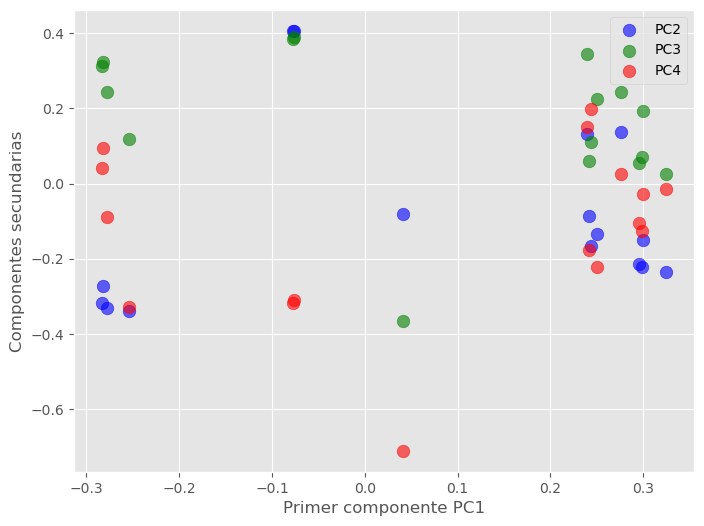

In [10]:
plt.figure(figsize=(8,6))
plt.scatter(modelo_pca2.components_[0,:],modelo_pca2.components_[1,:], s=9**2, c=["Blue"], alpha=0.6)
plt.scatter(modelo_pca2.components_[0,:],modelo_pca2.components_[2,:], s=9**2, c=["green"], alpha=0.6)
plt.scatter(modelo_pca2.components_[0,:],modelo_pca2.components_[3,:], s=9**2, c=["red"], alpha=0.6)
plt.subplot().legend(['PC2','PC3','PC4'])
plt.xlabel('Primer componente PC1')
plt.ylabel('Componentes secundarias')

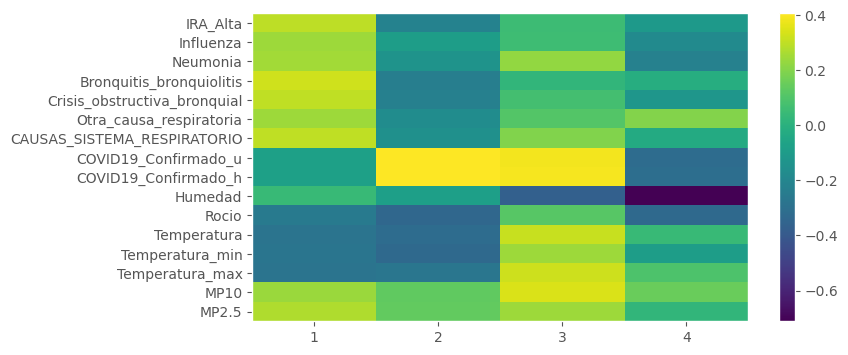

In [11]:
# Heatmap componentes
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
componentes2 = modelo_pca2.components_
plt.imshow(componentes2.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(dataframefinal.columns)), dataframefinal.columns)
plt.xticks(range(4), np.arange(modelo_pca2.n_components_) + 1)
plt.grid(False)
plt.colorbar();